## **Dataloading and Data Cleaning**

In [ ]:
# bangladesh_df.to_csv('MIRCA-OS_2015_rf_BD.csv', index=Falase)

In [ ]:
# # Load the second dataset. Replace 'path/to/your/second_dataset.csv' with the actual path.
# # Make sure to adjust the encoding if necessary.
# import pandas as pd
# try:
#     df2 = pd.read_csv('/content/MIRCA-OS_2015_rf_BD.csv', encoding='latin1')
#     display(df2.head())
# except FileNotFoundError:
#     print("Please replace 'path/to/your/second_dataset.csv' with the correct path to your second dataset.")
#     df2 = None # Set df2 to None so we don't try to merge later

In [ ]:
import pandas as pd

# List of file paths with metadata
files = [
    ("/content/MIRCA-OS_2000_ir_BD.csv", 2000, "ir"),
    ("/content/MIRCA-OS_2000_rf_BD.csv", 2000, "rf"),
    ("/content/MIRCA-OS_2005_ir_BD.csv", 2005, "ir"),
    ("/content/MIRCA-OS_2005_rf_BD.csv", 2005, "rf"),
    ("/content/MIRCA-OS_2010_ir_BD.csv", 2010, "ir"),
    ("/content/MIRCA-OS_2010_rf_BD.csv", 2010, "rf"),
    ("/content/MIRCA-OS_2015_ir_BD.csv", 2015, "ir"),
    ("/content/MIRCA-OS_2015_rf_BD.csv", 2015, "rf")
]

# Read, add year/system columns, and store in list
dfs = []
for file, year, system in files:
    df = pd.read_csv(file, encoding="latin1")
    df["Year_from_file"] = year     # ensures correct year tag
    df["System"] = system           # irrigated vs rainfed
    dfs.append(df)

# Merge all into one DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Optional: reorder columns (so Year/System come first)
cols = ["Year_from_file", "System"] + [c for c in merged_df.columns if c not in ["Year_from_file", "System"]]
merged_df = merged_df[cols]

# Save to CSV
merged_df.to_csv("/content/MIRCA_OS_Bangladesh_merged.csv", index=False)

print("Merged dataset shape:", merged_df.shape)
print("Preview:\n", merged_df.head())


Merged dataset shape: (13840, 14)
Preview:
    Year_from_file System     Country    State District  unit_code     Crop  \
0            2000     ir  Bangladesh  Barisal  Barguna     500001   Barley   
1            2000     ir  Bangladesh  Barisal  Barguna     500001  Cassava   
2            2000     ir  Bangladesh  Barisal  Barguna     500001    Cocoa   
3            2000     ir  Bangladesh  Barisal  Barguna     500001   Coffee   
4            2000     ir  Bangladesh  Barisal  Barguna     500001   Cotton   

   Subcrop       Type  Growing_area  Planting_Month  Maturity_Month Province  \
0        1     Annual           0.0               6              10      NaN   
1        1     Annual           0.0              11               3      NaN   
2        1  Perennial           0.0               1              12      NaN   
3        1  Perennial           0.0               1              12      NaN   
4        1     Annual           0.0              11               5      NaN   

  Dist

In [ ]:
merged_df.head()

Year_from_file System     Country    State District  unit_code     Crop  \
0            2000     ir  Bangladesh  Barisal  Barguna     500001   Barley   
1            2000     ir  Bangladesh  Barisal  Barguna     500001  Cassava   
2            2000     ir  Bangladesh  Barisal  Barguna     500001    Cocoa   
3            2000     ir  Bangladesh  Barisal  Barguna     500001   Coffee   
4            2000     ir  Bangladesh  Barisal  Barguna     500001   Cotton   

   Subcrop       Type  Growing_area  Planting_Month  Maturity_Month Province  \
0        1     Annual           0.0               6              10      NaN   
1        1     Annual           0.0              11               3      NaN   
2        1  Perennial           0.0               1              12      NaN   
3        1  Perennial           0.0               1              12      NaN   
4        1     Annual           0.0              11               5      NaN   

  Distrct  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [ ]:
merged_df.columns

Index(['Year_from_file', 'System', 'Country', 'State', 'District', 'unit_code',
       'Crop', 'Subcrop', 'Type', 'Growing_area', 'Planting_Month',
       'Maturity_Month', 'Province', 'Distrct'],
      dtype='object')

In [ ]:
import pandas as pd

files = [
    ("/content/MIRCA-OS_2000_ir_BD.csv", "2000_ir"),
    ("/content/MIRCA-OS_2000_rf_BD.csv", "2000_rf"),
    ("/content/MIRCA-OS_2005_ir_BD.csv", "2005_ir"),
    ("/content/MIRCA-OS_2005_rf_BD.csv", "2005_rf"),
    ("/content/MIRCA-OS_2010_ir_BD.csv", "2010_ir"),
    ("/content/MIRCA-OS_2010_rf_BD.csv", "2010_rf"),
    ("/content/MIRCA-OS_2015_ir_BD.csv", "2015_ir"),
    ("/content/MIRCA-OS_2015_rf_BD.csv", "2015_rf")
]

# Store results
col_sets = {}

for file, label in files:
    df = pd.read_csv(file, encoding="latin1", nrows=5)  # only read first few rows
    col_sets[label] = set(df.columns)

# Compare column sets
for label, cols in col_sets.items():
    print(f"\n{label} -> {len(cols)} columns")
    print(cols)

# Optionally: check if all are equal
all_equal = all(cols == list(col_sets.values())[0] for cols in col_sets.values())
print("\nAll datasets have equal columns? ->", all_equal)



2000_ir -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_Month', 'District', 'Crop', 'Type', 'Country', 'Subcrop'}

2000_rf -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_Month', 'District', 'Crop', 'Type', 'Country', 'Subcrop'}

2005_ir -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_Month', 'District', 'Crop', 'Type', 'Country', 'Subcrop'}

2005_rf -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_Month', 'District', 'Crop', 'Type', 'Country', 'Subcrop'}

2010_ir -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_Month', 'District', 'Crop', 'Type', 'Country', 'Subcrop'}

2010_rf -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_Month', 'District', 'Crop', 'Type', 'Country', 'Subcrop'}

2015_ir -> 10 columns
{'unit_code', 'Planting_Month', 'Province', 'Growing_area', 'Maturity_M

In [ ]:
import pandas as pd
import re

# List of file paths
file_paths = [
    '/content/MIRCA-OS_2000_ir_BD.csv',
    '/content/MIRCA-OS_2000_rf_BD.csv',
    '/content/MIRCA-OS_2005_ir_BD.csv',
    '/content/MIRCA-OS_2005_rf_BD.csv',
    '/content/MIRCA-OS_2010_ir_BD.csv',
    '/content/MIRCA-OS_2010_rf_BD.csv',
    '/content/MIRCA-OS_2015_ir_BD.csv',
    '/content/MIRCA-OS_2015_rf_BD.csv'  # Note: duplicate of df2
]

# Initialize empty list to collect DataFrames
dfs = []

# Loop through each file, read and annotate
for path in file_paths:
    # Extract year and system using regex
    match = re.search(r'_(\d{4})_(ir|rf)_', path)
    if match:
        year = match.group(1)
        system = match.group(2)
    else:
        year = None
        system = None

    # Read CSV
    temp_df = pd.read_csv(path, encoding='latin1')

    # Add metadata columns
    temp_df['year'] = year
    temp_df['system'] = system

    # Append to list
    dfs.append(temp_df)

# Concatenate all into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# Optional: check result
print(df.head())
print(df[['year', 'system']].drop_duplicates())

      Country Province District  unit_code     Crop  Subcrop       Type  \
0  Bangladesh  Barisal  Barguna     500001   Barley        1     Annual   
1  Bangladesh  Barisal  Barguna     500001  Cassava        1     Annual   
2  Bangladesh  Barisal  Barguna     500001    Cocoa        1  Perennial   
3  Bangladesh  Barisal  Barguna     500001   Coffee        1  Perennial   
4  Bangladesh  Barisal  Barguna     500001   Cotton        1     Annual   

   Growing_area  Planting_Month  Maturity_Month  year system  
0           0.0               6              10  2000     ir  
1           0.0              11               3  2000     ir  
2           0.0               1              12  2000     ir  
3           0.0               1              12  2000     ir  
4           0.0              11               5  2000     ir  
       year system
0      2000     ir
1730   2000     rf
3460   2005     ir
5190   2005     rf
6920   2010     ir
8650   2010     rf
10380  2015     ir
12110  2015     rf


In [ ]:
df.head()

Country Province District  unit_code     Crop  Subcrop       Type  \
0  Bangladesh  Barisal  Barguna     500001   Barley        1     Annual   
1  Bangladesh  Barisal  Barguna     500001  Cassava        1     Annual   
2  Bangladesh  Barisal  Barguna     500001    Cocoa        1  Perennial   
3  Bangladesh  Barisal  Barguna     500001   Coffee        1  Perennial   
4  Bangladesh  Barisal  Barguna     500001   Cotton        1     Annual   

   Growing_area  Planting_Month  Maturity_Month  year system  
0           0.0               6              10  2000     ir  
1           0.0              11               3  2000     ir  
2           0.0               1              12  2000     ir  
3           0.0               1              12  2000     ir  
4           0.0              11               5  2000     ir

In [ ]:
df.tail()

Country Province District  unit_code        Crop  Subcrop  \
13835  Bangladesh   Sylhet   Sylhet     500064  Sugar cane        1   
13836  Bangladesh   Sylhet   Sylhet     500064   Sunflower        1   
13837  Bangladesh   Sylhet   Sylhet     500064   Sunflower        1   
13838  Bangladesh   Sylhet   Sylhet     500064      Wheat1        2   
13839  Bangladesh   Sylhet   Sylhet     500064      Wheat2        2   

            Type  Growing_area  Planting_Month  Maturity_Month  year system  
13835  Perennial           0.0               1              12  2015     rf  
13836     Annual           0.0               6              10  2015     rf  
13837     Annual           0.0               6              10  2015     rf  
13838     Annual          23.0              12               4  2015     rf  
13839     Annual          23.0               5               9  2015     rf

In [ ]:
df.to_csv('crop_calender_BD.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         13840 non-null  object 
 1   Province        13840 non-null  object 
 2   District        13840 non-null  object 
 3   unit_code       13840 non-null  int64  
 4   Crop            13840 non-null  object 
 5   Subcrop         13840 non-null  int64  
 6   Type            13840 non-null  object 
 7   Growing_area    13840 non-null  float64
 8   Planting_Month  13840 non-null  int64  
 9   Maturity_Month  13840 non-null  int64  
 10  year            13840 non-null  object 
 11  system          13840 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.3+ MB


In [ ]:
print(22101061%20)

1


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/crop_production_dataset_10years2005-2014.csv')

In [ ]:
df['Area(ha)'] = df['Area(acres)'] * 0.40468564224
df.head()

District    Division  Year Crop Type  Area(acres)  Production(tons)  \
0      Khulna      Khulna  2006  Aus Rice      10750.0            5557.0   
1      Jessor      Khulna  2006  Aus Rice      72520.0           75625.0   
2    Satkhira      Khulna  2006  Aus Rice       3720.0            3606.0   
3   Chuadanga      Khulna  2006  Aus Rice      20660.0           15796.0   
4  Chittagong  Chittagong  2006  Aus Rice      91835.0           86859.0   

       Area(ha)  
0   4350.370654  
1  29347.802775  
2   1505.430589  
3   8360.805369  
4  37164.305955

In [ ]:
df.columns

Index(['District', 'Division', 'Year', 'Crop Type', 'Area(acres)',
       'Production(tons)', 'Area(ha)'],
      dtype='object')

In [ ]:
df.pop('Area(acres)')

0       10750.0
1       72520.0
2        3720.0
3       20660.0
4       91835.0
         ...   
460    249138.0
461    557836.0
462    910930.0
463    886941.0
464    661263.0
Name: Area(acres), Length: 465, dtype: float64

In [ ]:
df.head()

District    Division  Year Crop Type  Production(tons)      Area(ha)
0      Khulna      Khulna  2006  Aus Rice            5557.0   4350.370654
1      Jessor      Khulna  2006  Aus Rice           75625.0  29347.802775
2    Satkhira      Khulna  2006  Aus Rice            3606.0   1505.430589
3   Chuadanga      Khulna  2006  Aus Rice           15796.0   8360.805369
4  Chittagong  Chittagong  2006  Aus Rice           86859.0  37164.305955

In [ ]:
df["Yield_t_ha"] = df["Production(tons)"] / df["Area(ha)"]


In [ ]:
df.tail()

District      Division  Year  Crop Type  Production(tons)       Area(ha)  \
460  Noakhali    Chittagong  2005  Boro Rice          342958.0  100822.571536   
461  Dinajpur  North region  2005  Boro Rice          764233.0  225748.219925   
462   Rangpur  North region  2005  Boro Rice         1228937.0  368640.292086   
463  Rajshahi  North region  2005  Boro Rice         1274843.0  358932.288214   
464     Bogra  North region  2005  Boro Rice          901785.0  267603.641845   

     Yield_t_ha  
460    3.401599  
461    3.385333  
462    3.333702  
463    3.551765  
464    3.369853

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          465 non-null    object 
 1   Division          465 non-null    object 
 2   Year              465 non-null    int64  
 3   Crop Type         465 non-null    object 
 4   Production(tons)  464 non-null    float64
 5   Area(ha)          464 non-null    float64
 6   Yield_t_ha        459 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 25.6+ KB


In [ ]:
df.head()

District    Division  Year Crop Type  Production(tons)      Area(ha)  \
0      Khulna      Khulna  2006  Aus Rice            5557.0   4350.370654   
1      Jessor      Khulna  2006  Aus Rice           75625.0  29347.802775   
2    Satkhira      Khulna  2006  Aus Rice            3606.0   1505.430589   
3   Chuadanga      Khulna  2006  Aus Rice           15796.0   8360.805369   
4  Chittagong  Chittagong  2006  Aus Rice           86859.0  37164.305955   

   Yield_t_ha Season  
0    1.277362    Aus  
1    2.576854    Aus  
2    2.395328    Aus  
3    1.889292    Aus  
4    2.337162    Aus

In [ ]:
def map_season(crop):
    crop = crop.lower()
    if "boro" in crop:
        return "Boro"
    elif "aus" in crop:
        return "Aus"
    elif "aman" in crop:
        return "Aman"
    else:
        return "Other"

df["Season"] = df["Crop Type"].apply(map_season)


In [ ]:
for col in df.columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values in column 'District':
['Khulna' 'Jessor' 'Satkhira' 'Chuadanga' 'Chittagong' "Cox's Bazar"
 'Chandpur' 'Feni' 'Comilla' 'Rangamati' 'Noakhali' 'Khagrachhari'
 'Dinajpur' 'Rangpur' 'Rajshahi' 'Bogura' 'Kushtia' 'Bogra']
------------------------------
Unique values in column 'Division':
['Khulna' 'Chittagong' 'North region']
------------------------------
Unique values in column 'Year':
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2005]
------------------------------
Unique values in column 'Crop Type':
['Aus Rice' 'Aman Rice' 'Boro Rice']
------------------------------
Unique values in column 'Production(tons)':
[5.557000e+03 7.562500e+04 3.606000e+03 1.579600e+04 8.685900e+04
 1.897000e+03 2.483800e+04 2.526200e+04 9.006900e+04 7.989000e+03
 5.664800e+04 5.111000e+03 1.434300e+04 0.000000e+00 6.716900e+04
 1.589100e+04 8.060000e+03 8.057100e+04 2.955000e+03 1.985100e+04
 9.352300e+04 1.837000e+03 1.561000e+04 1.820600e+04 5.067700e+04
 8.723000e+03 4.772200e+04 5.791000e

In [ ]:
df.tail(10)

District      Division  Year  Crop Type  Production(tons)  \
455      Jessor        Khulna  2005  Boro Rice         1008922.0   
456     Kushtia        Khulna  2005  Boro Rice          301038.0   
457  Chittagong    Chittagong  2005  Boro Rice          313277.0   
458     Comilla    Chittagong  2005  Boro Rice         1157012.0   
459   Rangamati    Chittagong  2005  Boro Rice           21817.0   
460    Noakhali    Chittagong  2005  Boro Rice          342958.0   
461    Dinajpur  North region  2005  Boro Rice          764233.0   
462     Rangpur  North region  2005  Boro Rice         1228937.0   
463    Rajshahi  North region  2005  Boro Rice         1274843.0   
464       Bogra  North region  2005  Boro Rice          901785.0   

          Area(ha)  Yield_t_ha Season  
455  270179.870643    3.734260   Boro  
456   82118.810523    3.665884   Boro  
457  110824.781870    2.826778   Boro  
458  336798.816383    3.435321   Boro  
459    6928.218195    3.149006   Boro  
460  100822.571536    3.401599   Boro  
461  225748.219925    3.385333   Boro  
462  368640.292086    3.333702   Boro  
463  358932.288214    3.551765   Boro  
464  267603.641845    3.369853   Boro

In [ ]:
df.pop('Crop Type')

0       Aus Rice
1       Aus Rice
2       Aus Rice
3       Aus Rice
4       Aus Rice
         ...    
460    Boro Rice
461    Boro Rice
462    Boro Rice
463    Boro Rice
464    Boro Rice
Name: Crop Type, Length: 465, dtype: object

In [ ]:
df.head(10)

District    Division  Year  Production(tons)      Area(ha)  Yield_t_ha  \
0       Khulna      Khulna  2006            5557.0   4350.370654    1.277362   
1       Jessor      Khulna  2006           75625.0  29347.802775    2.576854   
2     Satkhira      Khulna  2006            3606.0   1505.430589    2.395328   
3    Chuadanga      Khulna  2006           15796.0   8360.805369    1.889292   
4   Chittagong  Chittagong  2006           86859.0  37164.305955    2.337162   
5  Cox's Bazar  Chittagong  2006            1897.0    698.082733    2.717443   
6     Chandpur  Chittagong  2006           24838.0  15171.664728    1.637131   
7         Feni  Chittagong  2006           25262.0  13935.350091    1.812800   
8      Comilla  Chittagong  2006           90069.0  47034.588769    1.914952   
9    Rangamati  Chittagong  2006            7989.0   5175.929364    1.543491   

  Season  
0    Aus  
1    Aus  
2    Aus  
3    Aus  
4    Aus  
5    Aus  
6    Aus  
7    Aus  
8    Aus  
9    Aus

In [ ]:
df.to_csv('crop_production_dataset_10years2005-2014_mod.csv', index=False)

In [ ]:
import pandas as pd

clim = pd.read_csv("/content/65 Years of Weather Data Bangladesh (1948 - 2013).csv")

In [ ]:
clim.columns

Index(['Unnamed: 0', 'Station Names', 'YEAR', 'Month', 'Max Temp', 'Min Temp',
       'Rainfall', 'Relative Humidity', 'Wind Speed', 'Cloud Coverage',
       'Bright Sunshine', 'Station Number', 'X_COR', 'Y_COR', 'LATITUDE',
       'LONGITUDE', 'ALT', 'Period'],
      dtype='object')

In [ ]:
clim = clim[["Station Names","YEAR","Month","Max Temp","Min Temp",
             "Rainfall","Relative Humidity","Wind Speed",
             "Cloud Coverage","Bright Sunshine"]]

In [ ]:
clim = clim.rename(columns={
    "YEAR":"Year",
    "Month":"Month",
    "Max Temp":"Tmax",
    "Min Temp":"Tmin",
    "Rainfall":"Rain",
    "Relative Humidity":"RH",
    "Wind Speed":"Wind",
    "Cloud Coverage":"Cloud",
    "Bright Sunshine":"Sunshine"
})

In [ ]:
#avg temp
clim["Tmean"] = (clim["Tmax"] + clim["Tmin"]) / 2


In [ ]:
station_names = clim['Station Names']

In [ ]:
unique_stations = clim['Station Names'].unique().tolist()


In [ ]:
clim.columns


Index(['Station Names', 'Year', 'Month', 'Tmax', 'Tmin', 'Rain', 'RH', 'Wind',
       'Cloud', 'Sunshine', 'Tmean'],
      dtype='object')

In [ ]:
station_to_Division = {
    #like station: Bhola, Division='Barisal'
    #key: values
    'Barisal': 'Barisal',
    'Bhola': 'Barisal',
    'Bogra': 'Rajshahi',
    'Chandpur': "Chittagong",
    'Chittagong (City-Ambagan)': "Chittagong",
    'Chittagong (IAP-Patenga)': "Chittagong",
    'Chuadanga': 'Khulna',
    'Comilla': "Chittagong",
    "Cox's Bazar": "Chittagong",
    'Dhaka': "Dhaka",
    'Dinajpur': 'Rangpur',
    'Faridpur': "Dhaka",
    'Feni': "Chittagong",
    'Hatiya': "Chittagong",
    'Ishurdi':'Rajshahi',
    'Jessore': 'Khulna',
    'Khepupara': 'Barisal',
    'Khulna': 'Khulna',
    'Kutubdia': "Chittagong",
    'Madaripur': "Dhaka",
    'Maijdee Court': "Chittagong",
    'Mongla': 'Khulna',
    'Mymensingh':'Rangpur',
    'Patuakhali': 'Barisal',
    'Rajshahi': 'Rajshahi',
    'Rangamati': "Chittagong",
    'Rangpur': 'Rangpur',
    'Sandwip': "Chittagong",
    'Satkhira': 'Khulna',
    'Sitakunda': "Chittagong",
    'Srimangal': 'Sylhet',
    'Syedpur': 'Rangpur',
    'Sylhet': 'Sylhet',
    'Tangail': "Dhaka",
    'Teknaf': "Chittagong"
}

In [ ]:
clim["Division"] = clim["Station Names"].map(station_to_Division)

In [ ]:
clim.head()

Station Names  Year  Month  Tmax  Tmin  Rain    RH      Wind  Cloud  \
0       Barisal  1949      1  29.4  12.3   0.0  68.0  0.453704    0.6   
1       Barisal  1950      1  30.0  14.1   0.0  77.0  0.453704    0.8   
2       Barisal  1951      1  28.2  12.3   0.0  77.0  0.453704    0.6   
3       Barisal  1952      1  26.6  12.3   2.0  77.0  0.453704    1.0   
4       Barisal  1953      1  30.0  13.3  10.0  75.0  0.453704    1.6   

   Sunshine  Tmean Division  
0  7.831915  20.85  Barisal  
1  7.831915  22.05  Barisal  
2  7.831915  20.25  Barisal  
3  7.831915  19.45  Barisal  
4  7.831915  21.65  Barisal

In [ ]:
# Check if any stations did not map
unmapped = clim[clim["Division"].isna()]["Station Names"].unique()
print("Stations without Division mapping:", unmapped)

Stations without Division mapping: []


In [ ]:
print(clim[["Station Names","Division"]].head())

  Station Names Division
0       Barisal  Barisal
1       Barisal  Barisal
2       Barisal  Barisal
3       Barisal  Barisal
4       Barisal  Barisal


In [ ]:
clim.pop('Station Names')

0        Barisal
1        Barisal
2        Barisal
3        Barisal
4        Barisal
          ...   
21115     Teknaf
21116     Teknaf
21117     Teknaf
21118     Teknaf
21119     Teknaf
Name: Station Names, Length: 21120, dtype: object

In [ ]:
clim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      21120 non-null  int64  
 1   Month     21120 non-null  int64  
 2   Tmax      21120 non-null  float64
 3   Tmin      21120 non-null  float64
 4   Rain      21120 non-null  float64
 5   RH        21120 non-null  float64
 6   Wind      21120 non-null  float64
 7   Cloud     21120 non-null  float64
 8   Sunshine  21120 non-null  float64
 9   Tmean     21120 non-null  float64
 10  Division  21120 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.8+ MB


In [ ]:
monthly_div = (clim
    .groupby(["Division","Year","Month"], as_index=False)
    .agg({
        "Rain":"sum",
        "Tmean":"mean",
        "Tmax":"mean",
        "Tmin":"mean",
        "RH":"mean",
        "Wind":"mean",
        "Cloud":"mean",
        "Sunshine":"sum"
    }))


In [ ]:
monthly_div

Division  Year  Month   Rain   Tmean   Tmax   Tmin    RH      Wind  \
0     Barisal  1949      1    0.0  20.850  29.40  12.30  68.0  0.453704   
1     Barisal  1949      2    9.0  24.550  33.90  15.20  63.0  0.659259   
2     Barisal  1949      3    8.0  28.450  36.70  20.20  59.0  1.085185   
3     Barisal  1949      4  140.0  28.900  33.90  23.90  71.0  1.772222   
4     Barisal  1949      5  217.0  30.300  35.60  25.00  76.0  1.703704   
...       ...   ...    ...    ...     ...    ...    ...   ...       ...   
5527   Sylhet  2013      8  940.0  30.350  35.40  25.30  85.5  2.850000   
5528   Sylhet  2013      9  588.0  30.575  36.10  25.05  84.5  2.800000   
5529   Sylhet  2013     10  610.0  29.175  35.50  22.85  83.0  2.250000   
5530   Sylhet  2013     11    5.0  24.075  32.35  15.80  77.5  2.050000   
5531   Sylhet  2013     12    5.0  22.200  31.30  13.10  79.5  1.950000   

      Cloud   Sunshine  
0       0.6   7.831915  
1       0.9   8.314894  
2       1.5   8.131915  
3       3.9   8.219149  
4       4.1   7.046809  
...     ...        ...  
5527    6.8   7.800000  
5528    5.8   9.100000  
5529    4.6  11.100000  
5530    0.7  17.900000  
5531    2.0  10.400000  

[5532 rows x 11 columns]

In [ ]:
clim.columns

Index(['Year', 'Month', 'Tmax', 'Tmin', 'Rain', 'RH', 'Wind', 'Cloud',
       'Sunshine', 'Tmean', 'Division'],
      dtype='object')

In [ ]:
clim = clim.rename(columns={
    "YEAR": "Year",
    "Month": "Month",
    "Max Temp": "MaxTemp",
    "Min Temp": "MinTemp",
    "Rainfall": "Rain",
    "Relative Humidity": "Humidity",
    "Wind Speed": "Wind",
    "Cloud Coverage": "Cloud",
    "Bright Sunshine": "Sunshine"
})

In [ ]:
import pandas as pd

def assign_season(row):
    m = row["Month"]
    if m in [4,5,6,7]:
        return "Aus"
    elif m in [7,8,9,10,11,12]:
        return "Aman"
    elif m in [11,12,1,2,3,4]:
        return "Boro"
    else:
        return None

clim["Season"] = clim.apply(assign_season, axis=1)

# Season year adjustment
clim["Season_Year"] = clim["Year"]
clim.loc[(clim["Season"]=="Boro") & (clim["Month"].isin([11,12])), "Season_Year"] += 1
#Season_Year is the harvest year of the crop


In [ ]:
clim.head()

Year  Month  Tmax  Tmin  Rain    RH      Wind  Cloud  Sunshine  Tmean  \
0  1949      1  29.4  12.3   0.0  68.0  0.453704    0.6  7.831915  20.85   
1  1950      1  30.0  14.1   0.0  77.0  0.453704    0.8  7.831915  22.05   
2  1951      1  28.2  12.3   0.0  77.0  0.453704    0.6  7.831915  20.25   
3  1952      1  26.6  12.3   2.0  77.0  0.453704    1.0  7.831915  19.45   
4  1953      1  30.0  13.3  10.0  75.0  0.453704    1.6  7.831915  21.65   

  Division Season  Season_Year  
0  Barisal   Boro         1949  
1  Barisal   Boro         1950  
2  Barisal   Boro         1951  
3  Barisal   Boro         1952  
4  Barisal   Boro         1953

In [ ]:
clim_features = (
    clim.groupby(["Division","Season_Year","Season"], as_index=False)
        .agg({
            "Rain": "sum",           # mm total rainfall
            "Tmax": "mean",          # mean max temp
            "Tmin": "mean",          # mean min temp
            "Tmean": "mean",         # avg daily temp
            "RH": "mean",            # mean relative humidity
            "Sunshine": "sum",       # total bright sunshine
            "Cloud": "mean",         # avg cloud cover
            "Wind": "mean"           # avg wind speed
        })
        .rename(columns={"Season_Year":"Year"})
)


In [ ]:
clim_features["TempRange"] = clim_features["Tmax"] - clim_features["Tmin"]


In [ ]:
clim_features.head()

Division  Year Season    Rain       Tmax   Tmin      Tmean         RH  \
0  Barisal  1949   Aman   770.0  32.700000  21.20  26.950000  76.200000   
1  Barisal  1949    Aus  1444.0  34.325000  25.10  29.712500  78.000000   
2  Barisal  1949   Boro    17.0  33.333333  15.90  24.616667  63.333333   
3  Barisal  1950   Aman   961.0  32.600000  21.82  27.210000  80.000000   
4  Barisal  1950    Aus  1175.0  34.850000  25.40  30.125000  82.250000   

    Sunshine  Cloud      Wind  TempRange  
0  31.672340  2.940  0.681481  11.500000  
1  23.076596  4.750  1.669444   9.225000  
2  24.278723  1.000  0.732716  17.433333  
3  31.672340  4.820  0.681481  10.780000  
4  23.076596  5.525  1.669444   9.450000

In [ ]:
clim_features.to_csv('clim_features.csv', index=False)

In [ ]:
clim_features.columns

Index(['Division', 'Year', 'Season', 'Rain', 'Tmax', 'Tmin', 'Tmean', 'RH',
       'Sunshine', 'Cloud', 'Wind', 'TempRange'],
      dtype='object')

## **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np
import re

# ------------- LOAD & NORMALIZE -------------
cal = pd.read_csv("crop_calender_BD.csv")

cal = cal.rename(columns={
    "Country":"Country",
    "Province":"Division",
    "District":"District",
    "unit_code":"unit_code",
    "Crop":"Crop",
    "Subcrop":"Subcrop",
    "Type":"Type",
    "Growing_area":"Growing_area",
    "Planting_Month":"Planting_Month",
    "Maturity_Month":"Maturity_Month",
    "year":"Year",
    "system":"System"          # 'ir' or 'rf'
})

# strip whitespace
for c in ["Country","Division","District","Crop","Subcrop","Type","System"]:
    if c in cal.columns:
        cal[c] = cal[c].astype(str).str.strip()

# numeric coercions
for c in ["Growing_area","Planting_Month","Maturity_Month","Year"]:
    if c in cal.columns:
        cal[c] = pd.to_numeric(cal[c], errors="coerce")

# ------------- KEEP ONLY RICE -------------
# Many MIRCA rows are for non-rice crops (barley, cassava, etc.).
# Keep rows that look like rice by Crop/Subcrop keywords.
def is_rice(row):
    text = (str(row.get("Crop","")) + " " + str(row.get("Subcrop",""))).lower()
    # common rice keywords
    if any(k in text for k in ["rice","paddy","aman","aus","boro"]):
        return True
    return False

cal = cal[cal.apply(is_rice, axis=1)].copy()

# If your rice appears only as "Crop=Rice" and "Subcrop in {Aman, Aus, Boro}", we’re covered.
# If not, you can add explicit mapping dicts here.

# ------------- MAP TO SEASON -------------
def map_season(crop, subcrop):
    s = (str(crop) + " " + str(subcrop)).lower()
    if "boro" in s: return "Boro"
    if "aman" in s: return "Aman"
    if "aus"  in s: return "Aus"
    # Fallback: infer from planting/maturity window if keywords missing
    return np.nan

cal["Season"] = cal.apply(lambda r: map_season(r["Crop"], r["Subcrop"]), axis=1)

# Fallback inference by months (only for rows still NaN after keyword mapping)
# Bangladesh rule of thumb:
# - Aus: plant ~Apr–May (4–5), harvest ~Jul–Aug (7–8)
# - Aman: plant/transplant ~Jul–Aug (7–8), harvest ~Nov–Dec (11–12)
# - Boro: plant ~Nov–Dec (11–12), harvest ~Apr–May (4–5)
def infer_season_by_month(pm, mm):
    try:
        pm, mm = int(pm), int(mm)
    except:
        return np.nan
    # allow some slop with month windows
    if pm in [4,5,6] and mm in [7,8,9]:
        return "Aus"
    if pm in [7,8,9] and mm in [11,12,1]:
        return "Aman"
    if pm in [11,12,1] and mm in [3,4,5]:
        return "Boro"
    return np.nan

mask_nan = cal["Season"].isna()
cal.loc[mask_nan, "Season"] = cal.loc[mask_nan].apply(
    lambda r: infer_season_by_month(r["Planting_Month"], r["Maturity_Month"]), axis=1
)

# drop anything that still isn’t confidently rice season
cal = cal[cal["Season"].notna()].copy()

# ------------- AGGREGATE TO SYSTEMS (ir/rf) -------------
# Use Growing_area as weight. We’ll produce Area_ir, Area_rf, Area_total and % irrigated.

# Some files have many small rows; compress first by the key to be safe
base_key = ["District","Division","Year","Season","System"]
cal_ag = (cal.groupby(base_key, as_index=False)
             .agg(Area_weight=("Growing_area","sum"),
                  Planting_Month_mean=("Planting_Month","mean"),
                  Maturity_Month_mean=("Maturity_Month","mean")))

# Pivot ir/rf into columns
irr = (cal_ag
       .pivot_table(index=["District","Division","Year","Season"],
                    columns="System", values="Area_weight", aggfunc="sum")
       .reset_index())
irr = irr.rename_axis(None, axis=1)  # remove pivot axis name
irr = irr.rename(columns={"ir":"Area_ir","rf":"Area_rf"})
for c in ["Area_ir","Area_rf"]:
    if c not in irr.columns:
        irr[c] = 0.0
irr["Area_ir"] = irr["Area_ir"].fillna(0.0)
irr["Area_rf"] = irr["Area_rf"].fillna(0.0)
irr["Area_total"] = irr["Area_ir"] + irr["Area_rf"]
irr["Pct_irrigated"] = irr.apply(
    lambda r: (r["Area_ir"]/r["Area_total"]) if r["Area_total"] and not pd.isna(r["Area_total"]) else 0.0, axis=1
)

# Area-weighted planting/maturity month (across rows and systems)
pm = (cal_ag.assign(w=cal_ag["Area_weight"])
               .groupby(["District","Division","Year","Season"], as_index=False)
               .apply(lambda g: pd.Series({
                   "Planting_Month_w": np.nan if g["w"].sum()==0 else (g["Planting_Month_mean"]*g["w"]).sum()/g["w"].sum(),
                   "Maturity_Month_w": np.nan if g["w"].sum()==0 else (g["Maturity_Month_mean"]*g["w"]).sum()/g["w"].sum()
               })))

irr = irr.merge(pm, on=["District","Division","Year","Season"], how="left")

# ------------- OUTPUT -------------
# This is your Step-5 output ready to merge with the panel:
# columns: District, Division, Year, Season, Area_ir, Area_rf, Area_total, Pct_irrigated, Planting_Month_w, Maturity_Month_w
print("Irrigation features:", irr.shape)
print(irr.head())

# If you already have `yield_with_ndvi` from Step 4:
# panel = yield_with_ndvi.merge(irr, on=["District","Division","Year","Season"], how="left")
# for c in ["Area_ir","Area_rf","Area_total","Pct_irrigated"]:
#     if c in panel.columns:
#         panel[c] = panel[c].fillna(0.0)
# print(panel.info())


/tmp/ipython-input-1223093053.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Aman' 'Boro' 'Aus' ... 'Aman' 'Boro' 'Aus']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cal.loc[mask_nan, "Season"] = cal.loc[mask_nan].apply(


Irrigation features: (772, 10)
   District Division  Year Season  Area_ir  Area_rf  Area_total  \
0  Bagerhat   Khulna  2000   Aman    307.0  74366.0     74673.0   
1  Bagerhat   Khulna  2000    Aus      0.0   7253.0      7253.0   
2  Bagerhat   Khulna  2000   Boro  24989.0  37493.0     62482.0   
3  Bagerhat   Khulna  2005   Aman    361.0  65288.0     65649.0   
4  Bagerhat   Khulna  2005    Aus      0.0   6367.0      6367.0   

   Pct_irrigated  Planting_Month_w  Maturity_Month_w  
0       0.004111          7.000000         11.995889  
1       0.000000          4.000000          8.000000  
2       0.399939          5.399331          4.600061  
3       0.005499          7.000000         11.994501  
4       0.000000          4.000000          8.000000  


/tmp/ipython-input-1223093053.py:116: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [ ]:
td= pd.read_csv("/content/crop_calender_BD.csv")
td.columns

Index(['Country', 'Division', 'District', 'unit_code', 'Crop', 'Subcrop',
       'Type', 'Growing_area', 'Planting_Month', 'Maturity_Month', 'year',
       'system'],
      dtype='object')

In [ ]:
td.head()


Country Division District  unit_code     Crop  Subcrop       Type  \
0  Bangladesh  Barisal  Barguna     500001   Barley        1     Annual   
1  Bangladesh  Barisal  Barguna     500001  Cassava        1     Annual   
2  Bangladesh  Barisal  Barguna     500001    Cocoa        1  Perennial   
3  Bangladesh  Barisal  Barguna     500001   Coffee        1  Perennial   
4  Bangladesh  Barisal  Barguna     500001   Cotton        1     Annual   

   Growing_area  Planting_Month  Maturity_Month  year system  
0           0.0               6              10  2000     ir  
1           0.0              11               3  2000     ir  
2           0.0               1              12  2000     ir  
3           0.0               1              12  2000     ir  
4           0.0              11               5  2000     ir

In [ ]:
irr.head()

District Division  Year Season  Area_ir  Area_rf  Area_total  \
0  Bagerhat   Khulna  2000   Aman    307.0  74366.0     74673.0   
1  Bagerhat   Khulna  2000    Aus      0.0   7253.0      7253.0   
2  Bagerhat   Khulna  2000   Boro  24989.0  37493.0     62482.0   
3  Bagerhat   Khulna  2005   Aman    361.0  65288.0     65649.0   
4  Bagerhat   Khulna  2005    Aus      0.0   6367.0      6367.0   

   Pct_irrigated  Planting_Month_w  Maturity_Month_w  
0       0.004111          7.000000         11.995889  
1       0.000000          4.000000          8.000000  
2       0.399939          5.399331          4.600061  
3       0.005499          7.000000         11.994501  
4       0.000000          4.000000          8.000000

In [ ]:
irr.to_csv('irr.csv')

In [ ]:
irr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          772 non-null    object 
 1   Division          772 non-null    object 
 2   Year              772 non-null    int64  
 3   Season            772 non-null    object 
 4   Area_ir           772 non-null    float64
 5   Area_rf           772 non-null    float64
 6   Area_total        772 non-null    float64
 7   Pct_irrigated     772 non-null    float64
 8   Planting_Month_w  732 non-null    float64
 9   Maturity_Month_w  732 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 60.4+ KB


In [ ]:
# What each column means:

# Area_ir → area under irrigated rice in that District–Year–Season

# Area_rf → area under rainfed rice

# Area_total → total rice area

# Pct_irrigated → share of irrigated area (critical for Boro rice yield stability)

# Planting_Month_w, Maturity_Month_w → area-weighted planting and maturity month (useful to align NDVI/climate to crop calendars; missing in some rows if area=0 or inconsistent data)

In [ ]:
yields_panel.info()#1 from step -02

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          465 non-null    object 
 1   Division          465 non-null    object 
 2   Year              465 non-null    int64  
 3   Production(tons)  464 non-null    float64
 4   Area(ha)          464 non-null    float64
 5   Yield_t_ha        459 non-null    float64
 6   Season            465 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 25.6+ KB


In [ ]:
clim_features.info()#2 from step-03

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Division   1383 non-null   object 
 1   Year       1383 non-null   int64  
 2   Season     1383 non-null   object 
 3   Rain       1383 non-null   float64
 4   Tmax       1383 non-null   float64
 5   Tmin       1383 non-null   float64
 6   Tmean      1383 non-null   float64
 7   RH         1383 non-null   float64
 8   Sunshine   1383 non-null   float64
 9   Cloud      1383 non-null   float64
 10  Wind       1383 non-null   float64
 11  TempRange  1383 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 129.8+ KB


In [ ]:
ndvi_features.info()#from Step 4 (Division-level)-->/content/ndvi_features_seasonal.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Division          1442 non-null   object        
 1   Year              1442 non-null   int64         
 2   Season            1442 non-null   object        
 3   NDVI_mean_season  1442 non-null   float64       
 4   NDVI_max_season   1442 non-null   float64       
 5   NDVI_integral     1442 non-null   float64       
 6   NDVI_peak_date    1442 non-null   datetime64[ns]
 7   NDVI_anom         1307 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 90.3+ KB


In [ ]:
irr.info()#from step-04

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          772 non-null    object 
 1   Division          772 non-null    object 
 2   Year              772 non-null    int64  
 3   Season            772 non-null    object 
 4   Area_ir           772 non-null    float64
 5   Area_rf           772 non-null    float64
 6   Area_total        772 non-null    float64
 7   Pct_irrigated     772 non-null    float64
 8   Planting_Month_w  732 non-null    float64
 9   Maturity_Month_w  732 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 60.4+ KB


In [ ]:
import pandas as pd
import numpy as np

# -------------------------
# 0) Make copies & standardize key types
# -------------------------
y = yields_panel.copy()
c = clim_features.copy()
v = ndvi_features.copy()
i = irr.copy()

for df in [y, c, v, i]:
    for col in ["District","Division","Season"]:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")


In [ ]:

# -------------------------
# 1) Start from TARGET (yields)
# -------------------------
panel = y.sort_values(["Division","District","Year","Season"]).copy()

# -------------------------
# 2) Join CLIMATE (Division-level)
# -------------------------
panel = panel.merge(
    c, on=["Division","Year","Season"], how="left"
)

# -------------------------
# 3) Join NDVI (Division-level)
# -------------------------
panel = panel.merge(
    v, on=["Division","Year","Season"], how="left"
)

# -------------------------
# 4) Join IRRIGATION / CALENDAR (District-level)
# -------------------------
panel = panel.merge(
    i, on=["District","Division","Year","Season"], how="left"
)

# -------------------------
# 5) Light imputations / sanity fixes
# -------------------------

# a) NDVI early-year NaNs (no 5-yr history) -> fill with Division×Season medians
ndvi_cols = ["NDVI_mean_season","NDVI_max_season","NDVI_integral","NDVI_anom"]
med = (panel.groupby(["Division","Season"])[ndvi_cols]
            .transform(lambda s: s.fillna(s.median())))
for col in ndvi_cols:
    panel[col] = panel[col].fillna(med[col])

# b) Irrigation zeros where missing (safe, conservative)
for col in ["Area_ir","Area_rf","Area_total","Pct_irrigated"]:
    if col in panel.columns:
        panel[col] = panel[col].fillna(0.0)

# c) Calendar weighted months: leave NaN if truly unknown (OK for tree models)
#    If you prefer, uncomment to round to ints:
# for col in ["Planting_Month_w","Maturity_Month_w"]:
#     if col in panel.columns:
#         panel[col] = panel[col].round().astype("Int64")

# d) Optional: drop rows missing the target
panel = panel[panel["Yield_t_ha"].notna()].copy()

# -------------------------
# 6) Final ordering & a quick report
# -------------------------
target_col = "Yield_t_ha"

first_cols = ["District","Division","Year","Season", target_col]
feature_cols = [c for c in panel.columns if c not in first_cols]
panel = panel[first_cols + feature_cols]

print("Final panel shape:", panel.shape)
print("Years covered:", sorted(panel["Year"].dropna().unique().tolist()))
print("Seasons:", panel["Season"].dropna().unique().tolist())
print("Nulls by column (top 10):")
print(panel.isna().sum().sort_values(ascending=False).head(10))

# -------------------------
# 7) Save for modeling
# -------------------------
panel.to_csv("training_panel.csv", index=False)
print("Saved -> training_panel.csv")

# -------------------------
# 8) (Optional) Create X/y views for modeling
# -------------------------
# Drop non-numeric / identifiers from features; keep dates if your model handles them.
id_cols = ["District","Division","Year","Season"]
exclude = set(id_cols + [target_col, "NDVI_peak_date"])
X = panel.drop(columns=[c for c in exclude if c in panel.columns])
y = panel[target_col].values

print("X shape:", X.shape, "| y shape:", y.shape)


Final panel shape: (459, 27)
Years covered: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Seasons: ['Aman', 'Aus', 'Boro']
Nulls by column (top 10):
Maturity_Month_w    411
Planting_Month_w    411
Tmax                150
Rain                150
Cloud               150
Wind                150
TempRange           150
Sunshine            150
RH                  150
Tmin                150
dtype: int64
Saved -> training_panel.csv
X shape: (459, 21) | y shape: (459,)


## **Model_Training**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

results = []
for test_year in sorted(np.unique(years)):
    train_idx = years != test_year
    test_idx  = years == test_year

    X_train, y_train = X.loc[train_idx], y[train_idx]
    X_test,  y_test  = X.loc[test_idx],  y[test_idx]

    model = lgb.LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)              # <-- fix here

    results.append({"Year": test_year, "MAE": mae, "RMSE": rmse})

cv_results = pd.DataFrame(results)
print(cv_results)
print("Overall MAE:",  cv_results["MAE"].mean())
print("Overall RMSE:", cv_results["RMSE"].mean())


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
test_block = panel.loc[test_idx, ["Season"]].copy()
test_block["y_true"] = y_test
test_block["y_pred"] = y_pred

by_season = (test_block
             .groupby("Season")
             .apply(lambda g: pd.Series({
                 "MAE": mean_absolute_error(g["y_true"], g["y_pred"]),
                 "RMSE": np.sqrt(mean_squared_error(g["y_true"], g["y_pred"]))
             }))
            )
print(f"\nYear {test_year} by season:\n", by_season)



Year 2014 by season:
              MAE      RMSE
Season                    
Aman    0.373740  0.424366
Aus     0.271696  0.322362
Boro    0.660956  0.818400


/tmp/ipython-input-56045149.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({


In [ ]:
# add lag-1 yield by district & season
panel_sorted = panel.sort_values(["District","Season","Year"]).copy()
panel_sorted["Yield_t_ha_lag1"] = (
    panel_sorted.groupby(["District","Season"])["Yield_t_ha"].shift(1)
)

# optionally add a 3-year moving avg (district-season baseline)
panel_sorted["Yield_t_ha_ma3"] = (
    panel_sorted.groupby(["District","Season"])["Yield_t_ha"]
    .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
    .reset_index(level=[0,1], drop=True)
)

# rebuild X, y with new features
id_cols = ["District","Division","Year","Season"]
target = "Yield_t_ha"
exclude = set(id_cols + [target, "NDVI_peak_date"])
X = panel_sorted.drop(columns=[c for c in exclude if c in panel_sorted.columns])
y = panel_sorted[target].values
years = panel_sorted["Year"].values


In [ ]:
# add lag-1 yield by district & season
panel_sorted = panel.sort_values(["District","Season","Year"]).copy()
panel_sorted["Yield_t_ha_lag1"] = (
    panel_sorted.groupby(["District","Season"])["Yield_t_ha"].shift(1)
)

# optionally add a 3-year moving avg (district-season baseline)
panel_sorted["Yield_t_ha_ma3"] = (
    panel_sorted.groupby(["District","Season"])["Yield_t_ha"]
    .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
    .reset_index(level=[0,1], drop=True)
)

# rebuild X, y with new features
id_cols = ["District","Division","Year","Season"]
target = "Yield_t_ha"
exclude = set(id_cols + [target, "NDVI_peak_date"])
X = panel_sorted.drop(columns=[c for c in exclude if c in panel_sorted.columns])
y = panel_sorted[target].values
years = panel_sorted["Year"].values


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

def loyo(X, y, years):
    rows = []
    for yr in sorted(np.unique(years)):
        tr = years != yr; te = years == yr
        m = lgb.LGBMRegressor(
            n_estimators=800, learning_rate=0.04,
            num_leaves=63, min_data_in_leaf=10,
            subsample=0.9, colsample_bytree=0.9,
            random_state=42
        )
        m.fit(X.loc[tr], y[tr])
        yp = m.predict(X.loc[te])
        mae = mean_absolute_error(y[te], yp)
        rmse = np.sqrt(mean_squared_error(y[te], yp))
        rows.append({"Year": yr, "MAE": mae, "RMSE": rmse})
    return pd.DataFrame(rows)

for season in ["Aman","Aus","Boro"]:
    mask = panel_sorted["Season"] == season
    print(f"\n=== {season} ===")
    res = loyo(X.loc[mask], y[mask], years[mask])
    print(res)
    print("MAE:", res.MAE.mean(), "RMSE:", res.RMSE.mean())


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
m = lgb.LGBMRegressor(n_estimators=800, learning_rate=0.04,
                      num_leaves=63, min_data_in_leaf=10,
                      subsample=0.9, colsample_bytree=0.9, random_state=42)
m.fit(X, y)
imp = pd.Series(m.feature_importances_, index=X.columns).sort_values(ascending=False)
print(imp.head(20))


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1398
[LightGBM] [Info] Number of data points in the train set: 459, number of used features: 23
[LightGBM] [Info] Start training from score 2.702942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [ ]:
panel_sorted["district_mean"] = (
    panel_sorted.groupby(["District","Season"])["Yield_t_ha"]
    .transform(lambda s: s.shift(1).expanding().mean())
)


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --------------------------
# 0) Prepare features (drop leakage + add lags)
# --------------------------
df = panel.copy()

# add lags per District & Season (safe for LOYO; we only use past years)
df = df.sort_values(["District","Season","Year"]).copy()
df["Yield_t_ha_lag1"] = df.groupby(["District","Season"])["Yield_t_ha"].shift(1)
df["Yield_t_ha_ma3"]  = (df.groupby(["District","Season"])["Yield_t_ha"]
                           .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
                           .reset_index(level=[0,1], drop=True))

# build X, y excluding identifiers, target, date-like, and leakage columns
id_cols   = ["District","Division","Year","Season"]
target    = "Yield_t_ha"
leak_cols = ["Area(ha)", "Production(tons)"]  # <-- leakage
drop_cols = set(id_cols + [target, "NDVI_peak_date"] + leak_cols)

X_full = df.drop(columns=[c for c in drop_cols if c in df.columns])
y_full = df[target].values
yrs    = df["Year"].values
seas   = df["Season"].values

print("Features used:", list(X_full.columns))
print("X shape:", X_full.shape, "| y shape:", y_full.shape)

# --------------------------
# 1) LOYO helper
# --------------------------
def run_loyo(X, y, years, booster_params=None):
    if booster_params is None:
        booster_params = dict(
            n_estimators=800,
            learning_rate=0.04,
            num_leaves=63,
            min_data_in_leaf=10,      # NOTE: LightGBM will warn about min_child_samples; safe to ignore
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        )
    rows = []
    for yr in sorted(np.unique(years)):
        tr = years != yr
        te = years == yr
        model = lgb.LGBMRegressor(**booster_params)
        model.fit(X.loc[tr], y[tr])
        yp = model.predict(X.loc[te])
        mae = mean_absolute_error(y[te], yp)
        rmse = np.sqrt(mean_squared_error(y[te], yp))  # manual sqrt for older sklearn
        rows.append({"Year": int(yr), "MAE": mae, "RMSE": rmse})
    return pd.DataFrame(rows)

# --------------------------
# 2) Overall LOYO
# --------------------------
overall = run_loyo(X_full, y_full, yrs)
print("\n=== Overall LOYO (all seasons) ===")
print(overall)
print("Overall MAE:", overall["MAE"].mean())
print("Overall RMSE:", overall["RMSE"].mean())

# --------------------------
# 3) Per-season LOYO
# --------------------------
for season in ["Aman","Aus","Boro"]:
    mask = (seas == season)
    if mask.sum() == 0:
        continue
    res = run_loyo(X_full.loc[mask], y_full[mask], yrs[mask])
    print(f"\n=== {season} LOYO ===")
    print(res)
    print(f"{season} MAE:",  res["MAE"].mean())
    print(f"{season} RMSE:", res["RMSE"].mean())

# --------------------------
# 4) Fit one final model on ALL data for feature importance
# --------------------------
final_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=63,
    min_data_in_leaf=10,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
final_model.fit(X_full, y_full)
imp = pd.Series(final_model.feature_importances_, index=X_full.columns).sort_values(ascending=False)
print("\nTop 20 feature importances:\n", imp.head(20))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
panel.head(5)

District    Division  Year Season  Yield_t_ha  Production(tons)  \
0  Chandpur  Chittagong  2006   Aman    1.616437           77183.0   
1  Chandpur  Chittagong  2006    Aus    1.637131           24838.0   
2  Chandpur  Chittagong  2006   Boro    3.152636          205306.0   
3  Chandpur  Chittagong  2007   Aman    1.245932           42389.0   
4  Chandpur  Chittagong  2007    Aus    1.644910           15610.0   

       Area(ha)     Rain       Tmax       Tmin  ...  NDVI_max_season  \
0  47748.858928  11330.0  33.193333  22.158333  ...            0.706   
1  15171.664728  20913.0  35.358333  25.102083  ...            0.622   
2  65122.013549      4.0  32.894444  17.744444  ...            0.610   
3  34021.921943  18559.0  33.193333  22.370000  ...            0.756   
4   9489.878311  23695.0  35.333333  24.902083  ...            0.559   

   NDVI_integral  NDVI_peak_date  NDVI_anom  Area_ir  Area_rf  Area_total  \
0          8.931      2006-11-01   0.001120      0.0      0.0         0.0   
1          6.032      2006-07-21   0.029217      0.0      0.0         0.0   
2          4.689      2006-03-01   0.030467      0.0      0.0         0.0   
3          9.197      2007-10-21   0.032587      0.0      0.0         0.0   
4          5.630      2007-04-01  -0.006517      0.0      0.0         0.0   

   Pct_irrigated  Planting_Month_w Maturity_Month_w  
0            0.0               NaN              NaN  
1            0.0               NaN              NaN  
2            0.0               NaN              NaN  
3            0.0               NaN              NaN  
4            0.0               NaN              NaN  

[5 rows x 27 columns]

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------
# Prepare dataset
# -------------------------
df = panel.copy()

# Add lag features
df = df.sort_values(["District","Season","Year"]).copy()
df["Yield_t_ha_lag1"] = df.groupby(["District","Season"])["Yield_t_ha"].shift(1)
df["Yield_t_ha_ma3"]  = (df.groupby(["District","Season"])["Yield_t_ha"]
                           .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
                           .reset_index(level=[0,1], drop=True))

id_cols   = ["District","Division","Year","Season"]
target    = "Yield_t_ha"
leak_cols = ["Area(ha)", "Production(tons)"]
drop_cols = set(id_cols + [target, "NDVI_peak_date"] + leak_cols)

# Dataset A (with lag)
X_withlag = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df[target].values
yrs = df["Year"].values
seas = df["Season"].values

# Dataset B (no lag)
lag_cols = ["Yield_t_ha_lag1","Yield_t_ha_ma3"]
X_nolag = X_withlag.drop(columns=[c for c in lag_cols if c in X_withlag.columns])

# -------------------------
# LOYO function
# -------------------------
def run_loyo(X, y, years, label):
    rows = []
    for yr in sorted(np.unique(years)):
        tr = years != yr
        te = years == yr
        model = lgb.LGBMRegressor(
            n_estimators=800,
            learning_rate=0.04,
            num_leaves=63,
            min_data_in_leaf=10,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        )
        model.fit(X.loc[tr], y[tr])
        yp = model.predict(X.loc[te])
        mae = mean_absolute_error(y[te], yp)
        rmse = np.sqrt(mean_squared_error(y[te], yp))
        rows.append({"Year": int(yr), "MAE": mae, "RMSE": rmse})
    res = pd.DataFrame(rows)
    print(f"\n=== {label} ===")
    print(res)
    print(f"{label} MAE:",  res["MAE"].mean())
    print(f"{label} RMSE:", res["RMSE"].mean())
    return res

# -------------------------
# Run experiments
# -------------------------
res_withlag = run_loyo(X_withlag, y, yrs, "Model A (with lag)")
res_nolag   = run_loyo(X_nolag,   y, yrs, "Model B (no lag)")

# -------------------------
# Compare
# -------------------------
comparison = pd.DataFrame({
    "Year": res_withlag["Year"],
    "MAE_withlag": res_withlag["MAE"],
    "MAE_nolag":   res_nolag["MAE"],
    "RMSE_withlag": res_withlag["RMSE"],
    "RMSE_nolag":   res_nolag["RMSE"]
})
print("\n=== Side-by-side comparison ===")
print(comparison)
print("\nAvg MAE with lag:", comparison["MAE_withlag"].mean(),
      "| Avg MAE no lag:", comparison["MAE_nolag"].mean())
print("Avg RMSE with lag:", comparison["RMSE_withlag"].mean(),
      "| Avg RMSE no lag:", comparison["RMSE_nolag"].mean())


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------
# 0) Prepare dataset
# -------------------------
df = panel.copy()

# Add lag features safely (sorted by District–Season–Year)
df = df.sort_values(["District","Season","Year"]).copy()
df["Yield_t_ha_lag1"] = df.groupby(["District","Season"])["Yield_t_ha"].shift(1)
df["Yield_t_ha_ma3"]  = (df.groupby(["District","Season"])["Yield_t_ha"]
                           .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
                           .reset_index(level=[0,1], drop=True))

id_cols   = ["District","Division","Year","Season"]
target    = "Yield_t_ha"
leak_cols = ["Area(ha)", "Production(tons)"]
drop_cols = set(id_cols + [target, "NDVI_peak_date"] + leak_cols)

# Dataset A (with lag)
X_withlag = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df[target].values
yrs = df["Year"].values
seas = df["Season"].values

# Dataset B (no lag)
lag_cols = ["Yield_t_ha_lag1","Yield_t_ha_ma3"]
X_nolag = X_withlag.drop(columns=[c for c in lag_cols if c in X_withlag.columns])

# -------------------------
# 1) LOYO helper
# -------------------------
def run_loyo(X, y, years, seasons, label, season_filter=None):
    rows = []
    for yr in sorted(np.unique(years)):
        tr = years != yr
        te = years == yr
        if season_filter is not None:
            tr = tr & (seasons == season_filter)
            te = te & (seasons == season_filter)
            if te.sum() == 0:  # skip if no samples in this year/season
                continue
        model = lgb.LGBMRegressor(
            n_estimators=800,
            learning_rate=0.04,
            num_leaves=63,
            min_data_in_leaf=10,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        )
        model.fit(X.loc[tr], y[tr])
        yp = model.predict(X.loc[te])
        mae = mean_absolute_error(y[te], yp)
        rmse = np.sqrt(mean_squared_error(y[te], yp))
        rows.append({"Year": int(yr), "Season": season_filter if season_filter else "All",
                     "MAE": mae, "RMSE": rmse})
    res = pd.DataFrame(rows)
    print(f"\n=== {label} | Season={season_filter or 'All'} ===")
    print(res)
    print(f"Avg MAE: {res['MAE'].mean():.3f} | Avg RMSE: {res['RMSE'].mean():.3f}")
    return res

# -------------------------
# 2) Run overall + per-season
# -------------------------
results = {}
for model_label, X in [("With lag", X_withlag), ("No lag", X_nolag)]:
    # Overall
    results[(model_label,"All")] = run_loyo(X, y, yrs, seas, model_label)
    # Per-season
    for season in ["Aman","Aus","Boro"]:
        results[(model_label,season)] = run_loyo(X, y, yrs, seas, model_label, season_filter=season)

# -------------------------
# 3) Summarize comparison
# -------------------------
summary = []
for (model_label, season), df_res in results.items():
    if len(df_res)==0: continue
    summary.append({
        "Model": model_label,
        "Season": season,
        "MAE_avg": df_res["MAE"].mean(),
        "RMSE_avg": df_res["RMSE"].mean()
    })
summary_df = pd.DataFrame(summary)
print("\n=== Comparison Summary ===")
print(summary_df)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# Helpers
# -----------------------------
def add_lags(df):
    df = df.sort_values(["District","Season","Year"]).copy()
    df["Yield_t_ha_lag1"] = df.groupby(["District","Season"])["Yield_t_ha"].shift(1)
    df["Yield_t_ha_ma3"]  = (df.groupby(["District","Season"])["Yield_t_ha"]
                               .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
                               .reset_index(level=[0,1], drop=True))
    return df

def make_feature_matrix(df, use_lags=True):
    id_cols   = ["District","Division","Year","Season"]
    target    = "Yield_t_ha"
    leak_cols = ["Area(ha)", "Production(tons)"]           # prevent leakage
    drop_cols = set(id_cols + [target, "NDVI_peak_date"] + leak_cols)

    X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")
    if not use_lags:
        for col in ["Yield_t_ha_lag1","Yield_t_ha_ma3"]:
            if col in X.columns:
                X = X.drop(columns=[col])
    y = df[target].values
    years = df["Year"].values
    seasons = df["Season"].values
    return X, y, years, seasons

def loyo_cv(X, y, years, booster_params=None):
    if booster_params is None:
        booster_params = dict(
            n_estimators=900,
            learning_rate=0.04,
            num_leaves=63,
            min_data_in_leaf=8,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        )
    rows, y_true_all, y_pred_all, year_all = [], [], [], []
    for yr in sorted(np.unique(years)):
        tr = years != yr
        te = years == yr
        model = lgb.LGBMRegressor(**booster_params)
        model.fit(X.loc[tr], y[tr])
        yp = model.predict(X.loc[te])
        y_true_all.append(y[te])
        y_pred_all.append(yp)
        year_all.append(np.full(yp.shape, yr))
        mae = mean_absolute_error(y[te], yp)
        rmse = np.sqrt(mean_squared_error(y[te], yp))  # sklearn<0.22 compatible
        r2 = r2_score(y[te], yp)
        rows.append({"Year": int(yr), "MAE": mae, "RMSE": rmse, "R2": r2})
    oof_y  = np.concatenate(y_true_all)
    oof_yp = np.concatenate(y_pred_all)
    years_vec = np.concatenate(year_all)
    overall = {
        "MAE": mean_absolute_error(oof_y, oof_yp),
        "RMSE": np.sqrt(mean_squared_error(oof_y, oof_yp)),
        "R2": r2_score(oof_y, oof_yp)
    }
    return pd.DataFrame(rows), overall, oof_y, oof_yp, years_vec

def summarize_per_season(df_panel, y_true, y_pred):
    out = []
    tmp = df_panel[["Season"]].copy()
    tmp["y_true"] = y_true
    tmp["y_pred"] = y_pred
    for s, g in tmp.groupby("Season"):
        mae = mean_absolute_error(g["y_true"], g["y_pred"])
        rmse = np.sqrt(mean_squared_error(g["y_true"], g["y_pred"]))
        r2 = r2_score(g["y_true"], g["y_pred"])
        out.append({"Season": s, "MAE": mae, "RMSE": rmse, "R2": r2})
    return pd.DataFrame(out)

def naive_lag1_baseline(df):
    # Predict current yield = last year's yield (within District×Season)
    d = df.sort_values(["District","Season","Year"]).copy()
    d["y_pred_lag1"] = d.groupby(["District","Season"])["Yield_t_ha"].shift(1)
    valid = d["y_pred_lag1"].notna()
    mae = mean_absolute_error(d.loc[valid,"Yield_t_ha"], d.loc[valid,"y_pred_lag1"])
    rmse = np.sqrt(mean_squared_error(d.loc[valid,"Yield_t_ha"], d.loc[valid,"y_pred_lag1"]))
    r2 = r2_score(d.loc[valid,"Yield_t_ha"], d.loc[valid,"y_pred_lag1"])
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

# -----------------------------
# 1) Prepare data
# -----------------------------
df0 = panel.copy()
df0 = add_lags(df0)

# WITH lags
X_with, y, yrs, seas = make_feature_matrix(df0, use_lags=True)
# NO lags
X_nolag, _, _, _ = make_feature_matrix(df0, use_lags=False)

print("Features WITH lags:", list(X_with.columns))
print("Features NO lags  :", list(X_nolag.columns))

# -----------------------------
# 2) LOYO CV – WITH lags
# -----------------------------
res_with, overall_with, y_true_with, y_pred_with, years_with = loyo_cv(X_with, y, yrs)
print("\n=== LOYO (WITH lag) per-year ===\n", res_with)
print("WITH lag overall:", overall_with)

# per-season (WITH lags)
per_season_with = summarize_per_season(df0.reset_index(drop=True), y_true_with, y_pred_with)
print("\nWITH lag per-season:\n", per_season_with)

# -----------------------------
# 3) LOYO CV – NO lags
# -----------------------------
res_nolag, overall_nolag, y_true_nl, y_pred_nl, years_nl = loyo_cv(X_nolag, y, yrs)
print("\n=== LOYO (NO lag) per-year ===\n", res_nolag)
print("NO lag overall:", overall_nolag)

# per-season (NO lags)
per_season_nolag = summarize_per_season(df0.reset_index(drop=True), y_true_nl, y_pred_nl)
print("\nNO lag per-season:\n", per_season_nolag)

# -----------------------------
# 4) Naïve baseline (lag-1) for reference
# -----------------------------
baseline = naive_lag1_baseline(df0)
print("\nNaïve lag-1 baseline (where available):", baseline)

# -----------------------------
# 5) Fit final model on ALL data (WITH lags) for importances
# -----------------------------
final = lgb.LGBMRegressor(
    n_estimators=1000, learning_rate=0.03,
    num_leaves=63, min_data_in_leaf=8,
    subsample=0.9, colsample_bytree=0.9,
    random_state=42
)
final.fit(X_with, y)
imp = pd.Series(final.feature_importances_, index=X_with.columns).sort_values(ascending=False)
print("\nTop 20 feature importances (final WITH-lag model):\n", imp.head(20))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# train_yield_pipeline.py
import os
import json
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump

OUTDIR = "model_outputs"
os.makedirs(OUTDIR, exist_ok=True)

PANEL_PATH = "training_panel.csv"   # produced in Step 6

# -----------------------------
# Helpers
# -----------------------------
def add_lags(df: pd.DataFrame) -> pd.DataFrame:
    df = df.sort_values(["District","Season","Year"]).copy()
    df["Yield_t_ha_lag1"] = df.groupby(["District","Season"])["Yield_t_ha"].shift(1)
    df["Yield_t_ha_ma3"]  = (df.groupby(["District","Season"])["Yield_t_ha"]
                               .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
                               .reset_index(level=[0,1], drop=True))
    return df

def build_feature_matrix(df: pd.DataFrame, use_lags=True):
    id_cols   = ["District","Division","Year","Season"]
    target    = "Yield_t_ha"
    leak_cols = ["Area(ha)", "Production(tons)"]  # never use these for training
    drop_cols = set(id_cols + [target, "NDVI_peak_date"] + leak_cols)
    X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")
    if not use_lags:
        for col in ["Yield_t_ha_lag1","Yield_t_ha_ma3"]:
            if col in X.columns:
                X = X.drop(columns=[col])
    y = df[target].values
    years = df["Year"].values
    seasons = df["Season"].values
    return X, y, years, seasons

def loyo_cv(X: pd.DataFrame, y: np.ndarray, years: np.ndarray, params=None):
    if params is None:
        params = dict(
            n_estimators=900,
            learning_rate=0.04,
            num_leaves=63,
            min_data_in_leaf=8,      # ok if LightGBM warns about min_child_samples
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        )
    rows, y_true_all, y_pred_all, yr_all = [], [], [], []
    for yr in sorted(np.unique(years)):
        tr = years != yr
        te = years == yr
        if te.sum() == 0:  # edge guard
            continue
        m = lgb.LGBMRegressor(**params)
        m.fit(X.loc[tr], y[tr])
        yp = m.predict(X.loc[te])
        y_true_all.append(y[te])
        y_pred_all.append(yp)
        yr_all.append(np.full(yp.shape, yr))

        mae = mean_absolute_error(y[te], yp)
        rmse = np.sqrt(mean_squared_error(y[te], yp))  # compat with older sklearn
        r2 = r2_score(y[te], yp)
        rows.append({"Year": int(yr), "MAE": mae, "RMSE": rmse, "R2": r2})

    per_year = pd.DataFrame(rows)
    oof_y  = np.concatenate(y_true_all) if y_true_all else np.array([])
    oof_yp = np.concatenate(y_pred_all) if y_pred_all else np.array([])
    oof_years = np.concatenate(yr_all) if yr_all else np.array([])

    overall = {}
    if oof_y.size:
        overall = {
            "MAE": float(mean_absolute_error(oof_y, oof_yp)),
            "RMSE": float(np.sqrt(mean_squared_error(oof_y, oof_yp))),
            "R2": float(r2_score(oof_y, oof_yp))
        }
    return per_year, overall, oof_y, oof_yp, oof_years

def summarize_per_season(df_panel: pd.DataFrame, y_true, y_pred):
    tmp = df_panel.loc[: , ["Season"]].copy()
    tmp["y_true"] = y_true
    tmp["y_pred"] = y_pred
    out = []
    for s, g in tmp.groupby("Season"):
        mae = mean_absolute_error(g["y_true"], g["y_pred"])
        rmse = np.sqrt(mean_squared_error(g["y_true"], g["y_pred"]))
        r2 = r2_score(g["y_true"], g["y_pred"])
        out.append({"Season": s, "MAE": mae, "RMSE": rmse, "R2": r2})
    return pd.DataFrame(out)

def train_final(X: pd.DataFrame, y: np.ndarray, params=None):
    if params is None:
        params = dict(
            n_estimators=1000,
            learning_rate=0.03,
            num_leaves=63,
            min_data_in_leaf=8,
            subsample=0.9,
            colsample_bytree=0.9,
            random_state=42
        )
    m = lgb.LGBMRegressor(**params)
    m.fit(X, y)
    imp = pd.Series(m.feature_importances_, index=X.columns).sort_values(ascending=False)
    return m, imp

# -----------------------------
# 1) Load panel and add lags
# -----------------------------
panel = pd.read_csv(PANEL_PATH)
# (Optional) quick climate gap impute within Division×Season:
clim_cols = [c for c in ["Rain","Tmax","Tmin","Tmean","RH","Sunshine","Cloud","Wind","TempRange"] if c in panel.columns]
if clim_cols:
    panel[clim_cols] = (panel.groupby(["Division","Season"])[clim_cols]
                        .transform(lambda g: g.fillna(g.median())))

panel = add_lags(panel)

# -----------------------------
# 2) Build two versions of feature sets: WITH lag and NO lag
# -----------------------------
X_with, y, years, seasons = build_feature_matrix(panel, use_lags=True)
X_nolag, _, _, _ = build_feature_matrix(panel, use_lags=False)

# Save feature lists
pd.Series(X_with.columns, name="feature").to_csv(os.path.join(OUTDIR, "features_with_lag.csv"), index=False)
pd.Series(X_nolag.columns, name="feature").to_csv(os.path.join(OUTDIR, "features_no_lag.csv"), index=False)

# -----------------------------
# 3) LOYO CV – overall
# -----------------------------
per_year_with, overall_with, oofy_w, oofp_w, oofyrs_w = loyo_cv(X_with, y, years)
per_year_nolag, overall_nolag, oofy_nl, oofp_nl, oofyrs_nl = loyo_cv(X_nolag, y, years)

per_year_with.to_csv(os.path.join(OUTDIR, "cv_per_year_with_lag.csv"), index=False)
per_year_nolag.to_csv(os.path.join(OUTDIR, "cv_per_year_no_lag.csv"), index=False)
with open(os.path.join(OUTDIR, "cv_overall_with_lag.json"), "w") as f:
    json.dump(overall_with, f, indent=2)
with open(os.path.join(OUTDIR, "cv_overall_no_lag.json"), "w") as f:
    json.dump(overall_nolag, f, indent=2)

# Per-season summaries
per_season_with = summarize_per_season(panel.reset_index(drop=True), oofy_w, oofp_w)
per_season_nolag = summarize_per_season(panel.reset_index(drop=True), oofy_nl, oofp_nl)
per_season_with.to_csv(os.path.join(OUTDIR, "cv_per_season_with_lag.csv"), index=False)
per_season_nolag.to_csv(os.path.join(OUTDIR, "cv_per_season_no_lag.csv"), index=False)

# -----------------------------
# 4) Train FINAL models
#    - One "all-season" model (backup)
#    - One model per season (Aman/Aus/Boro)
#    For BOTH configurations: WITH lag and NO lag
# -----------------------------
models_manifest = []

def train_and_save_bundle(tag: str, X: pd.DataFrame, y: np.ndarray, mask=None):
    """Train all-season and per-season models, save models + importances"""
    X_use, y_use = X, y
    if mask is not None:
        X_use, y_use = X.loc[mask], y[mask]

    # All-season model
    model_all, imp_all = train_final(X_use, y_use)
    dump(model_all, os.path.join(OUTDIR, f"lgb_{tag}_ALL.joblib"))
    imp_all.to_csv(os.path.join(OUTDIR, f"feature_importance_{tag}_ALL.csv"), header=["importance"])

    models_manifest.append({"tag": tag, "season": "ALL", "features": list(X.columns)})

    # Per-season
    for season_name in ["Aman","Aus","Boro"]:
        m = (panel["Season"].values == season_name)
        if mask is not None:
            m = m & mask
        if m.sum() == 0:
            continue
        model_s, imp_s = train_final(X.loc[m], y[m])
        dump(model_s, os.path.join(OUTDIR, f"lgb_{tag}_{season_name}.joblib"))
        imp_s.to_csv(os.path.join(OUTDIR, f"feature_importance_{tag}_{season_name}.csv"), header=["importance"])
        models_manifest.append({"tag": tag, "season": season_name, "features": list(X.columns)})

# Train/save WITH lag bundle
train_and_save_bundle("WITHLAG", X_with, y)

# Train/save NO lag bundle
train_and_save_bundle("NOLAG", X_nolag, y)

# Save manifest
with open(os.path.join(OUTDIR, "models_manifest.json"), "w") as f:
    json.dump(models_manifest, f, indent=2)

print("\n=== DONE ===")
print("Saved:")
print(" - Per-year CV:   cv_per_year_with_lag.csv, cv_per_year_no_lag.csv")
print(" - Per-season CV: cv_per_season_with_lag.csv, cv_per_season_no_lag.csv")
print(" - Overall CV:    cv_overall_with_lag.json, cv_overall_no_lag.json")
print(" - Models:        lgb_WITHLAG_[ALL|Aman|Aus|Boro].joblib, lgb_NOLAG_[...].joblib")
print(" - Importances:   feature_importance_[WITHLAG|NOLAG]_[...].csv")
print(" - Features used: features_with_lag.csv, features_no_lag.csv")


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# predict_yield.py
import pandas as pd
from joblib import load

MODEL_PATH = "model_outputs/lgb_WITHLAG_Boro.joblib"     # choose season & lag setup
FEATURES_PATH = "model_outputs/features_with_lag.csv"    # must match the model
features = pd.read_csv(FEATURES_PATH)["feature"].tolist()

model = load(MODEL_PATH)

# user_row must include ALL feature columns in 'features' (same names)
# For a quick demo, construct a DataFrame with one row:
user_row = pd.DataFrame([{f: 0 for f in features}])  # fill with your computed values

pred_yield = model.predict(user_row)[0]
print("Predicted yield (t/ha):", pred_yield)


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
Predicted yield (t/ha): 2.7741085441887363


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# === One-shot exporter: build a clean repo folder with all artifacts ===
import os, json, textwrap, shutil, glob, hashlib, time
from pathlib import Path

# ---------- Settings ----------
ROOT = Path("rice-yield").resolve()
OUT  = ROOT / "model_outputs"
SCRIPTS = ROOT / "scripts"

ROOT.mkdir(parents=True, exist_ok=True)
OUT.mkdir(parents=True, exist_ok=True)
SCRIPTS.mkdir(parents=True, exist_ok=True)

print(f"[INIT] Repo at: {ROOT}")

# ---------- 1) Try to save DataFrames (if they exist in your notebook) ----------
# We try common variable names from our previous steps. If missing, we skip gracefully.

def save_df_if_exists(varname, path):
    g = globals()
    if varname in g and g[varname] is not None:
        try:
            g[varname].to_csv(path, index=False)
            print(f"[OK] Saved {varname} -> {path}")
            return True
        except Exception as e:
            print(f"[WARN] Could not save {varname}: {e}")
    else:
        print(f"[SKIP] {varname} not found in notebook globals.")
    return False

# main training panel
save_df_if_exists("panel", OUT / "training_panel.csv")

# Optional raw features tables (handy for QA, optional)
save_df_if_exists("yields_panel", OUT / "yields_panel.csv")
save_df_if_exists("clim_features", OUT / "climate_features.csv")
save_df_if_exists("ndvi_features", OUT / "ndvi_features_seasonal.csv")
save_df_if_exists("irr", OUT / "irrigation_features.csv")

# If you have the final feature sets (X with/without lag) still in memory, save their columns:
def save_feature_list_if_exists(X_var, out_csv):
    g = globals()
    if X_var in g:
        import pandas as pd
        feats = list(g[X_var].columns)
        pd.Series(feats, name="feature").to_csv(out_csv, index=False)
        print(f"[OK] Saved features from {X_var} -> {out_csv}")
        return True
    print(f"[SKIP] {X_var} not found (will try to copy existing feature CSVs, if any).")
    return False

have_with = save_feature_list_if_exists("X_with", OUT / "features_with_lag.csv")
have_nolg = save_feature_list_if_exists("X_nolag", OUT / "features_no_lag.csv")

# ---------- 2) Copy any already-saved artifacts from your working dir (if present) ----------
# This picks up previously saved models/csv from prior runs.
def copy_if_exists(pattern, dest_dir=OUT):
    copied = 0
    for p in glob.glob(pattern):
        src = Path(p)
        if src.is_file():
            tgt = dest_dir / src.name
            if not tgt.exists() or src.stat().st_mtime > tgt.stat().st_mtime:
                shutil.copy2(src, tgt)
                copied += 1
    if copied:
        print(f"[OK] Copied {copied} files matching {pattern} -> {dest_dir}")
    return copied

# Try common artifact locations
# If your notebook already saved into ./model_outputs, this will copy them into the repo OUT dir.
copy_if_exists("model_outputs/*.joblib")
copy_if_exists("model_outputs/*.csv")
copy_if_exists("model_outputs/*.json")

# If feature CSVs weren’t in memory, try to copy existing ones:
if not have_with and (Path("model_outputs/features_with_lag.csv").exists()):
    shutil.copy2("model_outputs/features_with_lag.csv", OUT / "features_with_lag.csv")
    print("[OK] Copied features_with_lag.csv from existing model_outputs/")
if not have_nolg and (Path("model_outputs/features_no_lag.csv").exists()):
    shutil.copy2("model_outputs/features_no_lag.csv", OUT / "features_no_lag.csv")
    print("[OK] Copied features_no_lag.csv from existing model_outputs/")

#

[INIT] Repo at: /content/rice-yield
[OK] Saved panel -> /content/rice-yield/model_outputs/training_panel.csv
[OK] Saved yields_panel -> /content/rice-yield/model_outputs/yields_panel.csv
[OK] Saved clim_features -> /content/rice-yield/model_outputs/climate_features.csv
[OK] Saved ndvi_features -> /content/rice-yield/model_outputs/ndvi_features_seasonal.csv
[OK] Saved irr -> /content/rice-yield/model_outputs/irrigation_features.csv
[OK] Saved features from X_with -> /content/rice-yield/model_outputs/features_with_lag.csv
[OK] Saved features from X_nolag -> /content/rice-yield/model_outputs/features_no_lag.csv
[OK] Copied 8 files matching model_outputs/*.joblib -> /content/rice-yield/model_outputs
[OK] Copied 12 files matching model_outputs/*.csv -> /content/rice-yield/model_outputs
[OK] Copied 3 files matching model_outputs/*.json -> /content/rice-yield/model_outputs


In [ ]:
import os

for root, dirs, files in os.walk("/content", topdown=True):
    for name in files:
        if name.endswith(".zip"):
            print(os.path.join(root, name))


In [ ]:
import shutil, os

repo_path = "/content/rice-yield"
zip_path = "/content/rice-yield-package.zip"

if os.path.exists(repo_path):
    if os.path.exists(zip_path):
        os.remove(zip_path)   # remove old zip if exists
    shutil.make_archive("/content/rice-yield-package", "zip", repo_path)
    print("Zipped ->", zip_path)
else:
    print("Repo folder not found:", repo_path)


Zipped -> /content/rice-yield-package.zip


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train_errors, test_errors = [], []

for yr in sorted(np.unique(years)):
    tr, te = years != yr, years == yr
    model = lgb.LGBMRegressor(
        n_estimators=800, learning_rate=0.04,
        num_leaves=63, min_data_in_leaf=8,
        subsample=0.9, colsample_bytree=0.9,
        random_state=42
    )
    model.fit(X.loc[tr], y[tr])

    # errors
    y_train_pred = model.predict(X.loc[tr])
    y_test_pred  = model.predict(X.loc[te])

    mae_train = mean_absolute_error(y[tr], y_train_pred)
    mae_test  = mean_absolute_error(y[te], y_test_pred)

    train_errors.append(mae_train)
    test_errors.append(mae_test)
    print(f"Year {yr}: train MAE={mae_train:.3f}, test MAE={mae_test:.3f}")

print("Avg train MAE:", np.mean(train_errors))
print("Avg test  MAE:", np.mean(test_errors))

NameError: name 'years' is not defined

In [ ]:
# Re-run cells to define years, X, and y
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -------------------------
# Prepare dataset
# -------------------------
df = panel.copy()

# Add lag features safely (sorted by District–Season–Year)
df = df.sort_values(["District","Season","Year"]).copy()
df["Yield_t_ha_lag1"] = df.groupby(["District","Season"])["Yield_t_ha"].shift(1)
df["Yield_t_ha_ma3"]  = (df.groupby(["District","Season"])["Yield_t_ha"]
                           .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
                           .reset_index(level=[0,1], drop=True))

id_cols   = ["District","Division","Year","Season"]
target    = "Yield_t_ha"
leak_cols = ["Area(ha)", "Production(tons)"]
drop_cols = set(id_cols + [target, "NDVI_peak_date"] + leak_cols)

# Dataset A (with lag)
X = df.drop(columns=[c for c in drop_cols if c in df.columns])
y = df[target].values
years = df["Year"].values
seasons = df["Season"].values

NameError: name 'panel' is not defined

In [ ]:
yields_panel
clim_features
ndvi_features
irr

In [ ]:
# -------------------------
# 0) Make copies & standardize key types
# -------------------------
y = yields_panel.copy()
c = clim_features.copy()
v = ndvi_features.copy()
i = irr.copy()

for df in [y, c, v, i]:
    for col in ["District","Division","Season"]:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip()
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")

# -------------------------
# 1) Start from TARGET (yields)
# -------------------------
panel = y.sort_values(["Division","District","Year","Season"]).copy()

# -------------------------
# 2) Join CLIMATE (Division-level)
# -------------------------
panel = panel.merge(
    c, on=["Division","Year","Season"], how="left"
)

# -------------------------
# 3) Join NDVI (Division-level)
# -------------------------
panel = panel.merge(
    v, on=["Division","Year","Season"], how="left"
)

# -------------------------
# 4) Join IRRIGATION / CALENDAR (District-level)
# -------------------------
panel = panel.merge(
    i, on=["District","Division","Year","Season"], how="left"
)

# -------------------------
# 5) Light imputations / sanity fixes
# -------------------------

# a) NDVI early-year NaNs (no 5-yr history) -> fill with Division×Season medians
ndvi_cols = ["NDVI_mean_season","NDVI_max_season","NDVI_integral","NDVI_anom"]
med = (panel.groupby(["Division","Season"])[ndvi_cols]
            .transform(lambda s: s.fillna(s.median())))
for col in ndvi_cols:
    panel[col] = panel[col].fillna(med[col])

# b) Irrigation zeros where missing (safe, conservative)
for col in ["Area_ir","Area_rf","Area_total","Pct_irrigated"]:
    if col in panel.columns:
        panel[col] = panel[col].fillna(0.0)

# c) Calendar weighted months: leave NaN if truly unknown (OK for tree models)
#    If you prefer, uncomment to round to ints:
# for col in ["Planting_Month_w","Maturity_Month_w"]:
#     if col in panel.columns:
#         panel[col] = panel[col].round().astype("Int64")

# d) Optional: drop rows missing the target
panel = panel[panel["Yield_t_ha"].notna()].copy()

# -------------------------
# 6) Final ordering & a quick report
# -------------------------
target_col = "Yield_t_ha"

first_cols = ["District","Division","Year","Season", target_col]
feature_cols = [c for c in panel.columns if c not in first_cols]
panel = panel[first_cols + feature_cols]

print("Final panel shape:", panel.shape)
print("Years covered:", sorted(panel["Year"].dropna().unique().tolist()))
print("Seasons:", panel["Season"].dropna().unique().tolist())
print("Nulls by column (top 10):")
print(panel.isna().sum().sort_values(ascending=False).head(10))

# -------------------------
# 7) Save for modeling
# -------------------------
panel.to_csv("training_panel.csv", index=False)
print("Saved -> training_panel.csv")

# -------------------------
# 8) (Optional) Create X/y views for modeling
# -------------------------
# Drop non-numeric / identifiers from features; keep dates if your model handles them.
id_cols = ["District","Division","Year","Season"]
exclude = set(id_cols + [target_col, "NDVI_peak_date"])
X = panel.drop(columns=[c for c in exclude if c in panel.columns])
y = panel[target_col].values

print("X shape:", X.shape, "| y shape:", y.shape)

NameError: name 'yields_panel' is not defined

In [ ]:

clim_features= pd.read_csv("/content/clim_features.csv")
ndvi_features= pd.read_csv("/content/ndvi_features_seasonal.csv")
irr= pd.read_csv("/content/irr.csv")
yields_panel= pd.read_csv("/content/yields_panel.csv")
crop_production= pd.read_csv("/content/crop_production_dataset_10years2005-2014_mod.csv")
#

In [ ]:
print('clim_features')
print('ndvi_features')
print('irr')
print('yields_panel')
print('crop_production' )
clim_features.info()
ndvi_features.info()
irr.info()
yields_panel.info()
crop_production.info()

clim_features
ndvi_features
irr
yields_panel
crop_production
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Division   1383 non-null   object 
 1   Year       1383 non-null   int64  
 2   Season     1383 non-null   object 
 3   Rain       1383 non-null   float64
 4   Tmax       1383 non-null   float64
 5   Tmin       1383 non-null   float64
 6   Tmean      1383 non-null   float64
 7   RH         1383 non-null   float64
 8   Sunshine   1383 non-null   float64
 9   Cloud      1383 non-null   float64
 10  Wind       1383 non-null   float64
 11  TempRange  1383 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 129.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Div

In [ ]:
# === 1. Imports ===
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor

import joblib

# === 2. Load datasets ===
# Replace with your actual paths if saved as CSV
clim = pd.read_csv("/content/clim_features.csv")
ndvi = pd.read_csv("/content/ndvi_features_seasonal.csv")
irr = pd.read_csv("/content/irr.csv")
yields = pd.read_csv("/content/yields_panel.csv")

print("clim:", clim.shape, "ndvi:", ndvi.shape, "irr:", irr.shape, "yields:", yields.shape)



clim: (1383, 12) ndvi: (1442, 8) irr: (772, 11) yields: (465, 7)


In [ ]:
# Drop junk cols
irr = irr.drop(columns=[c for c in irr.columns if "Unnamed" in c], errors="ignore")

# === 3. Merge datasets ===
# First merge yields (target) with climate
panel = yields.merge(clim, on=["Division","Year","Season"], how="left")

# Add NDVI
panel = panel.merge(ndvi, on=["Division","Year","Season"], how="left")

# Add irrigation (use District-level if available)
panel = panel.merge(irr, on=["District","Division","Year","Season"], how="left")

print("Master panel:", panel.shape)
print(panel.head())

#

Master panel: (465, 27)
     District    Division  Year  Production(tons)      Area(ha)  Yield_t_ha  \
0      Khulna      Khulna  2006            5557.0   4350.370654    1.277362   
1      Jessor      Khulna  2006           75625.0  29347.802775    2.576854   
2    Satkhira      Khulna  2006            3606.0   1505.430589    2.395328   
3   Chuadanga      Khulna  2006           15796.0   8360.805369    1.889292   
4  Chittagong  Chittagong  2006           86859.0  37164.305955    2.337162   

  Season     Rain       Tmax       Tmin  ...  NDVI_max_season  NDVI_integral  \
0    Aus   4875.0  37.380000  25.790000  ...            0.450          4.886   
1    Aus   4875.0  37.380000  25.790000  ...            0.450          4.886   
2    Aus   4875.0  37.380000  25.790000  ...            0.450          4.886   
3    Aus   4875.0  37.380000  25.790000  ...            0.450          4.886   
4    Aus  20913.0  35.358333  25.102083  ...            0.622          6.032   

   NDVI_peak_date  N

In [ ]:
# === 4. Clean & preprocess ===
# Drop rows with missing target
panel = panel.dropna(subset=["Yield_t_ha"]).reset_index(drop=True)

# Fill missing numerical features with group median (per Division/Season)
num_cols = panel.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove("Yield_t_ha")

panel[num_cols] = panel.groupby(["Division","Season"])[num_cols].transform(lambda g: g.fillna(g.median()))
panel[num_cols] = panel[num_cols].fillna(panel[num_cols].median())

# Encode categorical vars
for cat in ["Division","District","Season"]:
    panel[cat] = panel[cat].astype("category").cat.codes

print("Final features:", panel.shape)



Final features: (459, 27)


## **Model_Train_02**

In [ ]:
clim_features= pd.read_csv("/content/clim_features.csv")
ndvi_features= pd.read_csv("/content/ndvi_features_seasonal.csv")
irr= pd.read_csv("/content/irr.csv")
yields_panel= pd.read_csv("/content/yields_panel.csv")
crop_production= pd.read_csv("/content/crop_production_dataset_10years2005-2014_mod.csv")


In [ ]:
# ===================== FULL PIPELINE (with date fix & numeric-only X) =====================
import os, json, warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")

# Optional libs (skip gracefully if missing)
try:
    from xgboost import XGBRegressor
except Exception:
    XGBRegressor = None
try:
    import lightgbm as lgb
except Exception:
    lgb = None

# ----------------------- OUTPUT DIR -----------------------
OUT_DIR = "/content/model_outputs_02"
os.makedirs(OUT_DIR, exist_ok=True)

# ----------------------- PICK YIELD SOURCE ----------------
# Prefer yields_panel if it already has Yield_t_ha
if "Yield_t_ha" in yields_panel.columns:
    yields = yields_panel.copy()
else:
    need = {"District","Division","Year","Season","Production(tons)","Area(ha)"}
    if not need.issubset(set(crop_production.columns)):
        raise SystemExit("[ERROR] Need yields_panel with Yield_t_ha OR crop_production with Production(tons) & Area(ha).")
    yields = crop_production.copy()
    yields["Yield_t_ha"] = yields["Production(tons)"] / yields["Area(ha)"]

# ----------------------- NORMALIZE KEYS -------------------
def normalize_keys(df):
    df = df.copy()
    for c in ["Division","District","Season"]:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip()
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")
    return df

clim_features = normalize_keys(clim_features)
ndvi_features = normalize_keys(ndvi_features)
irr           = normalize_keys(irr).drop(columns=[c for c in irr.columns if c.lower().startswith("unnamed")], errors="ignore")
yields        = normalize_keys(yields)

# ----------------------- MERGE PANEL ----------------------
panel = yields.merge(clim_features, on=["Division","Year","Season"], how="left")
panel = panel.merge(ndvi_features, on=["Division","Year","Season"], how="left")
panel = panel.merge(irr, on=["District","Division","Year","Season"], how="left")
print("[MERGE] Master panel:", panel.shape)

# ------------------ CLEAN & FEATURE ENGINEERING -----------
# 1) Drop rows without target
panel = panel.dropna(subset=["Yield_t_ha"]).reset_index(drop=True)

# 2) Fix NDVI_peak_date -> numeric features, drop string date
if "NDVI_peak_date" in panel.columns:
    panel["NDVI_peak_date"] = pd.to_datetime(panel["NDVI_peak_date"], errors="coerce")
    panel["NDVI_peak_month"] = panel["NDVI_peak_date"].dt.month
    panel["NDVI_peak_doy"]   = panel["NDVI_peak_date"].dt.dayofyear
    panel = panel.drop(columns=["NDVI_peak_date"])

# 3) Impute numeric gaps (Division×Season median, then global median)
num_cols_all = panel.select_dtypes(include=[np.number]).columns.tolist()
num_cols_for_impute = [c for c in num_cols_all if c not in ["Year","Yield_t_ha"]]
if num_cols_for_impute:
    panel[num_cols_for_impute] = (
        panel.groupby(["Division","Season"])[num_cols_for_impute]
             .transform(lambda g: g.fillna(g.median()))
    )
    panel[num_cols_for_impute] = panel[num_cols_for_impute].fillna(panel[num_cols_for_impute].median())

# 4) Lag features per District×Season (safe for forecasting)
panel = panel.sort_values(["District","Season","Year"]).copy()
panel["Yield_t_ha_lag1"] = panel.groupby(["District","Season"])["Yield_t_ha"].shift(1)
panel["Yield_t_ha_ma3"]  = (
    panel.groupby(["District","Season"])["Yield_t_ha"]
         .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
         .reset_index(level=[0,1], drop=True)
)

# Save training panel for reproducibility / API
panel.to_csv(f"{OUT_DIR}/training_panel.csv", index=False)

# ------------------ BUILD FEATURE MATRICES ----------------
ID_COLS   = ["District","Division","Year","Season"]
TARGET    = "Yield_t_ha"
LEAK_COLS = ["Area(ha)","Production(tons)"]  # never use for training

def build_X_numeric(df, use_lag=True):
    X = df.drop(columns=[c for c in [TARGET] + LEAK_COLS if c in df.columns]).copy()
    if not use_lag:
        for c in ["Yield_t_ha_lag1","Yield_t_ha_ma3"]:
            if c in X.columns:
                X.drop(columns=c, inplace=True)
    for c in ID_COLS:
        if c in X.columns:
            X.drop(columns=c, inplace=True)
    # Keep numeric columns only
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    X = X[num_cols].copy()
    return X

X_with  = build_X_numeric(panel, use_lag=True)
X_nolag = build_X_numeric(panel, use_lag=False)
y       = panel[TARGET].astype(float).values
years   = panel["Year"].astype(int).values
seasons = panel["Season"].astype(str).values

pd.Series(X_with.columns, name="feature").to_csv(f"{OUT_DIR}/features_with_lag.csv", index=False)
pd.Series(X_nolag.columns, name="feature").to_csv(f"{OUT_DIR}/features_no_lag.csv", index=False)

print("[FEATS] WITH-lag:", X_with.shape, "| NO-lag:", X_nolag.shape)

# ------------------ CV HELPERS & METRICS ------------------
def metrics(y_true, y_pred):
    return dict(
        MAE=float(mean_absolute_error(y_true, y_pred)),
        RMSE=float(np.sqrt(mean_squared_error(y_true, y_pred))),
        R2=float(r2_score(y_true, y_pred))
    )

def loyo_cv(X, y, yrs, model_ctor, params):
    rows, preds_all, truth_all = [], [], []
    for yr in sorted(np.unique(yrs)):
        tr = yrs != yr
        te = yrs == yr
        if te.sum() == 0:
            continue
        m = model_ctor(**params)
        m.fit(X.loc[tr], y[tr])
        yp = m.predict(X.loc[te])
        rows.append({"Year": int(yr), **metrics(y[te], yp)})
        preds_all.append(yp); truth_all.append(y[te])
    per_year = pd.DataFrame(rows)
    if preds_all:
        oof_pred = np.concatenate(preds_all)
        oof_true = np.concatenate(truth_all)
        overall = metrics(oof_true, oof_pred)
    else:
        overall = {"MAE": np.nan, "RMSE": np.nan, "R2": np.nan}
    return per_year, overall

def kfold_cv(X, y, model_ctor, params, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rows=[]
    for k, (tr, te) in enumerate(kf.split(X), 1):
        m = model_ctor(**params)
        m.fit(X.loc[tr], y[tr])
        yp = m.predict(X.loc[te])
        rows.append({"Fold": k, **metrics(y[te], yp)})
    return pd.DataFrame(rows)

# ------------------ CANDIDATE MODELS ----------------------
candidates = []
candidates.append(("RandomForest",
                   RandomForestRegressor,
                   dict(n_estimators=400, random_state=42, n_jobs=-1)))

if XGBRegressor is not None:
    candidates.append(("XGBoost",
                       XGBRegressor,
                       dict(n_estimators=800, learning_rate=0.05, max_depth=6,
                            subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1, tree_method="hist")))

if lgb is not None:
    candidates.append(("LightGBM",
                       lgb.LGBMRegressor,
                       dict(n_estimators=900, learning_rate=0.04, num_leaves=63,
                            min_data_in_leaf=8, subsample=0.9, colsample_bytree=0.9, random_state=42)))

# ------------------ RUN SUITES (WITH & NO LAG) ------------
def run_suite(tag, X):
    rows=[]
    for name, ctor, params in candidates:
        # LOYO overall
        per_year, overall = loyo_cv(X, y, years, ctor, params)
        per_year.to_csv(f"{OUT_DIR}/cv_per_year_{tag}_{name}.csv", index=False)
        # KFold
        kf_res = kfold_cv(X, y, ctor, params, n_splits=5)
        kf_res.to_csv(f"{OUT_DIR}/kfold_{tag}_{name}.csv", index=False)
        # Per-season LOYO
        season_rows=[]
        for s in ["Aman","Aus","Boro"]:
            mask = (seasons==s)
            if mask.sum()==0:
                continue
            per_year_s, overall_s = loyo_cv(X.loc[mask], y[mask], years[mask], ctor, params)
            per_year_s.to_csv(f"{OUT_DIR}/cv_per_year_{tag}_{name}_{s}.csv", index=False)
            season_rows.append({"Season": s, **overall_s})
        pd.DataFrame(season_rows).to_csv(f"{OUT_DIR}/cv_per_season_{tag}_{name}.csv", index=False)
        rows.append({"Model": name, "Tag": tag, **overall})
        print(f"{tag} | {name} -> MAE={overall['MAE']:.3f} RMSE={overall['RMSE']:.3f} R2={overall['R2']:.3f}")
    summary = pd.DataFrame(rows).sort_values("MAE")
    summary.to_csv(f"{OUT_DIR}/cv_summary_{tag}.csv", index=False)
    return summary

summary_with  = run_suite("WITHLAG", X_with)
summary_nolag = run_suite("NOLAG",  X_nolag)

# -------------- TRAIN & SAVE BEST BUNDLES -----------------
def train_final_bundle(tag, X, summary):
    best = summary.iloc[0]
    best_name = best["Model"]
    ctor, params = None, None
    for nm, c, p in candidates:
        if nm == best_name:
            ctor, params = c, p
            break
    if ctor is None:
        raise SystemExit(f"[ERROR] Could not find ctor for {best_name}")

    import joblib

    # ALL-season model
    m_all = ctor(**params); m_all.fit(X, y)
    all_path = f"{OUT_DIR}/best_{tag}_{best_name}_ALL.joblib"
    joblib.dump(m_all, all_path)
    pd.Series(X.columns, name="feature").to_csv(f"{OUT_DIR}/features_{tag}.csv", index=False)

    manifest = [{"tag": tag, "model": best_name, "season": "ALL", "path": all_path}]

    # Per-season models
    for s in ["Aman","Aus","Boro"]:
        mask = (seasons==s)
        if mask.sum()==0:
            continue
        m = ctor(**params); m.fit(X.loc[mask], y[mask])
        path = f"{OUT_DIR}/best_{tag}_{best_name}_{s}.joblib"
        joblib.dump(m, path)
        manifest.append({"tag": tag, "model": best_name, "season": s, "path": path})

    with open(f"{OUT_DIR}/models_manifest_{tag}.json", "w") as f:
        json.dump(manifest, f, indent=2)
    print(f"[SAVE] {tag}: saved ALL + per-season models using {best_name}")

train_final_bundle("WITHLAG", X_with, summary_with)
train_final_bundle("NOLAG",  X_nolag, summary_nolag)

# ------------------------ DONE ----------------------------
print("\n=== DONE ===")
print("Artifacts in:", OUT_DIR)
for fn in sorted(os.listdir(OUT_DIR)):
    print(" -", fn)


[MERGE] Master panel: (465, 27)
[FEATS] WITH-lag: (459, 23) | NO-lag: (459, 21)


KeyboardInterrupt: 

In [ ]:
# Check overall performance summary (WITH lag)
summary_with = pd.read_csv("/content/model_outputs/cv_summary_WITHLAG.csv")
print("WITH-lag summary:\n", summary_with)

# Check overall performance summary (NO lag)
summary_nolag = pd.read_csv("/content/model_outputs/cv_summary_NOLAG.csv")
print("NO-lag summary:\n", summary_nolag)

# If you want per-year breakdown for LightGBM WITH-lag
per_year = pd.read_csv("/content/model_outputs/cv_per_year_WITHLAG_LightGBM.csv")
print("\nLightGBM WITH-lag per-year:\n", per_year)

# If you want per-season breakdown
per_season = pd.read_csv("/content/model_outputs/cv_per_season_WITHLAG_LightGBM.csv")
print("\nLightGBM WITH-lag per-season:\n", per_season)


WITH-lag summary:
           Model      Tag       MAE      RMSE        R2
0  RandomForest  WITHLAG  0.256804  0.397769  0.761999
1       XGBoost  WITHLAG  0.279736  0.422038  0.732070
2      LightGBM  WITHLAG  0.291630  0.425434  0.727741
NO-lag summary:
           Model    Tag       MAE      RMSE        R2
0  RandomForest  NOLAG  0.435017  0.579056  0.495619
1      LightGBM  NOLAG  0.442827  0.585888  0.483647
2       XGBoost  NOLAG  0.452766  0.593998  0.469252

LightGBM WITH-lag per-year:
    Year       MAE      RMSE        R2
0  2005  0.460111  0.539798  0.391457
1  2006  0.355799  0.436310  0.664256
2  2007  0.273595  0.355302  0.854691
3  2008  0.285797  0.554014  0.574901
4  2009  0.289673  0.376441  0.788496
5  2010  0.203207  0.239745  0.907440
6  2011  0.217199  0.269583  0.855203
7  2012  0.276408  0.569658  0.558304
8  2013  0.328255  0.436428  0.725558
9  2014  0.278627  0.375712  0.764371

LightGBM WITH-lag per-season:
   Season       MAE      RMSE        R2
0   Aman  0.2


=== WITH-lag summary ===
          Model      Tag       MAE      RMSE        R2
0  RandomForest  WITHLAG  0.256804  0.397769  0.761999
1       XGBoost  WITHLAG  0.279736  0.422038  0.732070
2      LightGBM  WITHLAG  0.291630  0.425434  0.727741

=== NO-lag summary ===
          Model    Tag       MAE      RMSE        R2
0  RandomForest  NOLAG  0.435017  0.579056  0.495619
1      LightGBM  NOLAG  0.442827  0.585888  0.483647
2       XGBoost  NOLAG  0.452766  0.593998  0.469252


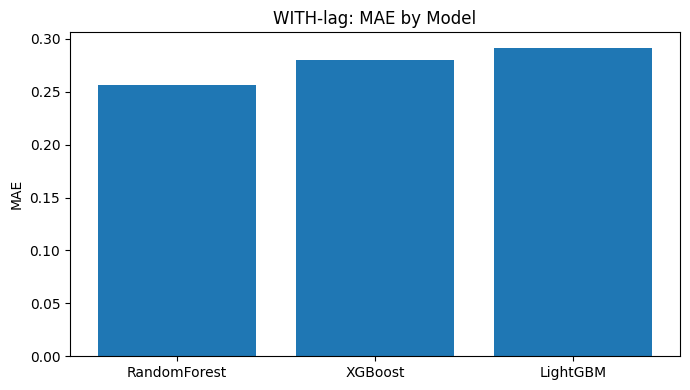

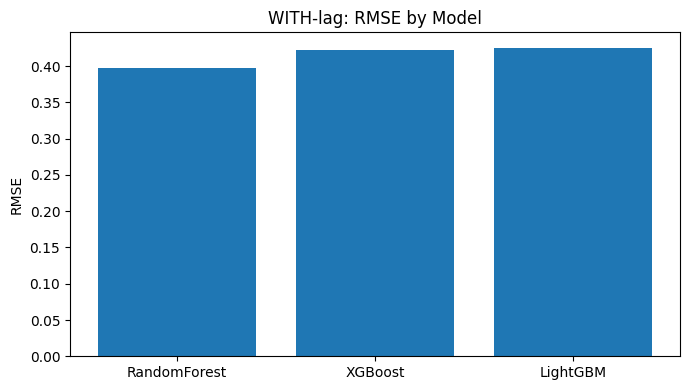

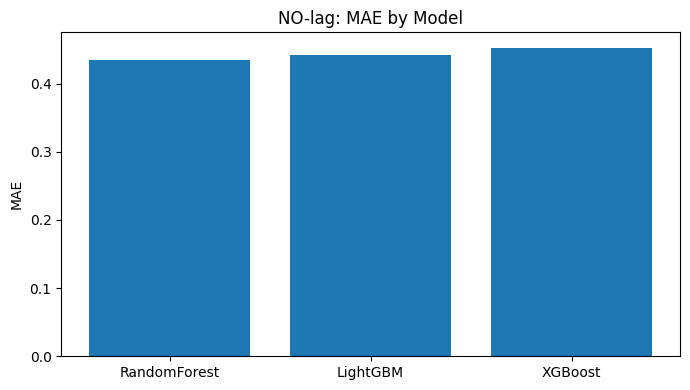

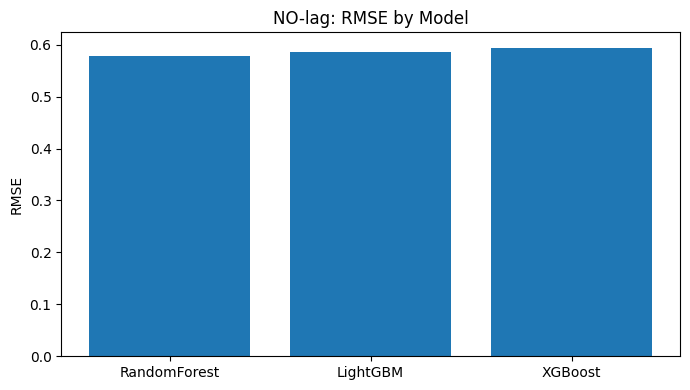


=== WITHLAG | RandomForest: per-season ===
  Season       MAE      RMSE        R2
0   Aman  0.185919  0.239028  0.584694
1    Aus  0.264448  0.361721  0.204377
2   Boro  0.277496  0.490962  0.040998


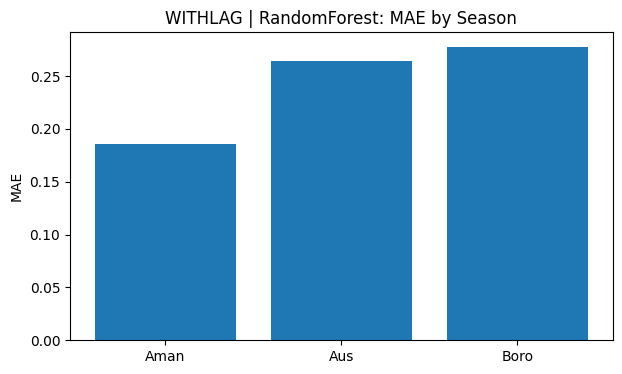

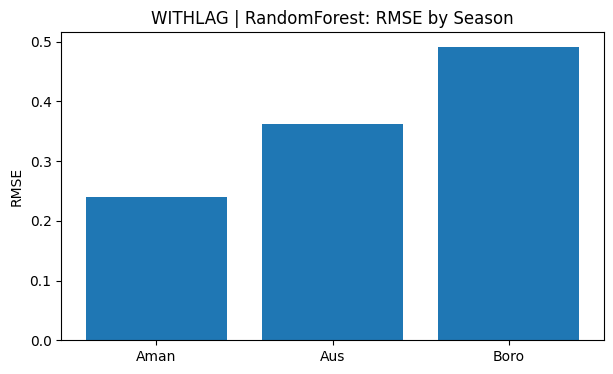


=== NOLAG | RandomForest: per-season ===
  Season       MAE      RMSE        R2
0   Aman  0.302998  0.364285  0.035387
1    Aus  0.339871  0.411983 -0.032093
2   Boro  0.288042  0.484125  0.067522


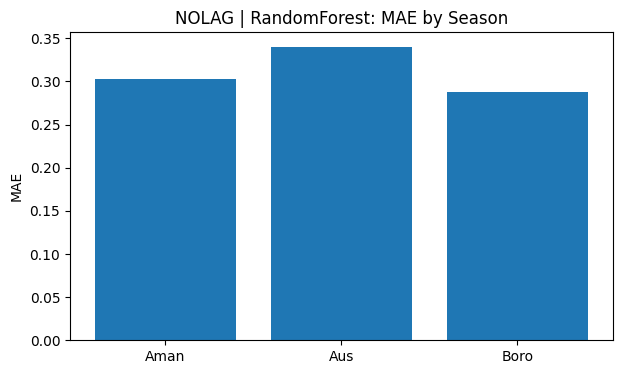

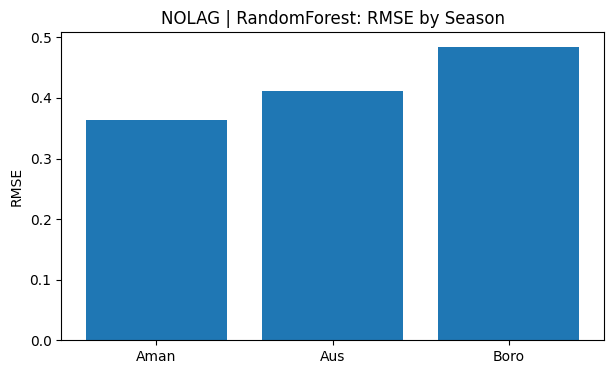

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
OUT_DIR = Path("/content/model_outputs")
withlag_path = OUT_DIR / "cv_summary_WITHLAG.csv"
nolag_path   = OUT_DIR / "cv_summary_NOLAG.csv"

# Load summaries
summary_with = pd.read_csv(withlag_path) if withlag_path.exists() else None
summary_nolag = pd.read_csv(nolag_path) if nolag_path.exists() else None

# Show summaries
print("\n=== WITH-lag summary ===")
if summary_with is not None:
    print(summary_with)

print("\n=== NO-lag summary ===")
if summary_nolag is not None:
    print(summary_nolag)

# Helper: bar plot
def bar_plot_scores(df, title, metric):
    plt.figure(figsize=(7,4))
    x = range(len(df))
    plt.bar(x, df[metric].values)
    plt.xticks(x, df["Model"].astype(str).tolist(), rotation=0)
    plt.ylabel(metric)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot overall comparisons
if summary_with is not None:
    bar_plot_scores(summary_with.sort_values("MAE"), "WITH-lag: MAE by Model", "MAE")
    bar_plot_scores(summary_with.sort_values("RMSE"), "WITH-lag: RMSE by Model", "RMSE")

if summary_nolag is not None:
    bar_plot_scores(summary_nolag.sort_values("MAE"), "NO-lag: MAE by Model", "MAE")
    bar_plot_scores(summary_nolag.sort_values("RMSE"), "NO-lag: RMSE by Model", "RMSE")

# Per-season breakdown for the best model in each tag
def per_season_plot(tag_summary, tag_name):
    if tag_summary is None or tag_summary.empty:
        return
    best_row = tag_summary.sort_values("MAE").iloc[0]
    best_model = best_row["Model"]
    per_season_path = OUT_DIR / f"cv_per_season_{tag_name}_{best_model}.csv"
    if not per_season_path.exists():
        return
    season_df = pd.read_csv(per_season_path)
    print(f"\n=== {tag_name} | {best_model}: per-season ===")
    print(season_df)
    # MAE
    plt.figure(figsize=(7,4))
    plt.bar(season_df["Season"], season_df["MAE"])
    plt.ylabel("MAE")
    plt.title(f"{tag_name} | {best_model}: MAE by Season")
    plt.show()
    # RMSE
    plt.figure(figsize=(7,4))
    plt.bar(season_df["Season"], season_df["RMSE"])
    plt.ylabel("RMSE")
    plt.title(f"{tag_name} | {best_model}: RMSE by Season")
    plt.show()

per_season_plot(summary_with, "WITHLAG")
per_season_plot(summary_nolag, "NOLAG")


### **Model_Train_03**

In [ ]:
# ========================= RICH-LAG PIPELINE WITH FEATURE SELECTION =========================
import os, json, warnings
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

warnings.filterwarnings("ignore")

# ----------------------- OPTIONAL LIBS -----------------------
try:
    from xgboost import XGBRegressor
except Exception:
    XGBRegressor = None
try:
    import lightgbm as lgb
except Exception:
    lgb = None

# ----------------------- OUTPUT DIR -----------------------
OUT_DIR = "/content/model_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# ----------------------- LOAD / PICK YIELD SOURCE ----------------
def _safe_read_csv(path):
    return pd.read_csv(path) if os.path.exists(path) else None

# If the variables already exist in memory, we’ll use them; otherwise read from /content
if 'clim_features' not in globals():
    clim_features = _safe_read_csv("/content/clim_features.csv")
if 'ndvi_features' not in globals():
    ndvi_features = _safe_read_csv("/content/ndvi_features_seasonal.csv")
if 'irr' not in globals():
    irr = _safe_read_csv("/content/irr.csv")
if 'yields_panel' not in globals():
    yields_panel = _safe_read_csv("/content/yields_panel.csv")
if 'crop_production' not in globals():
    crop_production = _safe_read_csv("/content/crop_production_dataset_10years2005-2014_mod.csv")

# Pick yields source (prefer yields_panel if has Yield_t_ha)
if (yields_panel is not None) and ("Yield_t_ha" in yields_panel.columns):
    yields = yields_panel.copy()
else:
    need = {"District","Division","Year","Season","Production(tons)","Area(ha)"}
    if (crop_production is None) or (not need.issubset(set(crop_production.columns))):
        raise SystemExit("[ERROR] Need yields_panel with Yield_t_ha OR crop_production with Production(tons) & Area(ha).")
    yields = crop_production.copy()
    yields["Yield_t_ha"] = yields["Production(tons)"] / yields["Area(ha)"]

# ----------------------- NORMALIZE KEYS -------------------
def normalize_keys(df):
    df = df.copy()
    for c in ["Division","District","Season"]:
        if c in df.columns:
            df[c] = df[c].astype(str).str.strip()
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")
    return df

clim = normalize_keys(clim_features)
ndvi = normalize_keys(ndvi_features)
irr  = normalize_keys(irr).drop(columns=[c for c in irr.columns if c and c.lower().startswith("unnamed")], errors="ignore")
ylds = normalize_keys(yields)

# ----------------------- MERGE PANEL ----------------------
panel = ylds.merge(clim, on=["Division","Year","Season"], how="left")
panel = panel.merge(ndvi, on=["Division","Year","Season"], how="left")
panel = panel.merge(irr,  on=["District","Division","Year","Season"], how="left")
print("[MERGE] Master panel:", panel.shape)

# ------------------ CLEAN & BASE ENGINEERING --------------
# 1) Drop rows without target
panel = panel.dropna(subset=["Yield_t_ha"]).reset_index(drop=True)

# 2) Fix NDVI_peak_date -> numeric features; then drop date col
if "NDVI_peak_date" in panel.columns:
    panel["NDVI_peak_date"] = pd.to_datetime(panel["NDVI_peak_date"], errors="coerce")
    panel["NDVI_peak_month"] = panel["NDVI_peak_date"].dt.month
    panel["NDVI_peak_doy"]   = panel["NDVI_peak_date"].dt.dayofyear
    panel = panel.drop(columns=["NDVI_peak_date"])

# 3) Impute numeric gaps (Division×Season median, then global median)
num_cols_all = panel.select_dtypes(include=[np.number]).columns.tolist()
num_cols_for_impute = [c for c in num_cols_all if c not in ["Year","Yield_t_ha"]]
if num_cols_for_impute:
    panel[num_cols_for_impute] = (
        panel.groupby(["Division","Season"])[num_cols_for_impute]
             .transform(lambda g: g.fillna(g.median()))
    )
    panel[num_cols_for_impute] = panel[num_cols_for_impute].fillna(panel[num_cols_for_impute].median())

# ------------------ RICH LAG FEATURES ---------------------
panel = panel.sort_values(["District","Season","Year"]).copy()

# 1) Yield lags (1,2,3) and moving average
for lag in [1,2,3]:
    panel[f"Yield_t_ha_lag{lag}"] = panel.groupby(["District","Season"])["Yield_t_ha"].shift(lag)

panel["Yield_t_ha_ma3"] = (
    panel.groupby(["District","Season"])["Yield_t_ha"]
         .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
         .reset_index(level=[0,1], drop=True)
)

# 2) NDVI lags & trends (NDVI_mean_season; add others similarly if desired)
if "NDVI_mean_season" in panel.columns:
    for lag in [1,2]:
        panel[f"NDVI_mean_lag{lag}"] = panel.groupby(["Division","Season"])["NDVI_mean_season"].shift(lag)
    panel["NDVI_mean_trend2"] = panel["NDVI_mean_season"] - panel["NDVI_mean_lag2"]

# 3) Rolling means (climate & NDVI mean)
roll_cols = [c for c in ["Rain","Tmax","Tmin","Sunshine","NDVI_mean_season"] if c in panel.columns]
for col in roll_cols:
    panel[f"{col}_ma3"] = (
        panel.groupby(["Division","Season"])[col]
             .apply(lambda s: s.shift(1).rolling(3, min_periods=1).mean())
             .reset_index(level=[0,1], drop=True)
    )

# 4) Interactions (core ones)
def safe_mul(a, b): return a * b
if set(["Yield_t_ha_lag1","Rain"]).issubset(panel.columns):
    panel["lag1_rain_interaction"] = safe_mul(panel["Yield_t_ha_lag1"], panel["Rain"])
if set(["NDVI_mean_season","Rain"]).issubset(panel.columns):
    panel["ndvi_rain_interaction"] = safe_mul(panel["NDVI_mean_season"], panel["Rain"])
if set(["NDVI_mean_season","Yield_t_ha_lag1"]).issubset(panel.columns):
    panel["lag1_ndvi_interaction"] = safe_mul(panel["Yield_t_ha_lag1"], panel["NDVI_mean_season"])

# Save engineered panel (for reproducibility / API)
panel.to_csv(f"{OUT_DIR}/training_panel_richlags.csv", index=False)

# ------------------ BUILD FEATURE MATRICES ----------------
ID_COLS   = ["District","Division","Year","Season"]
TARGET    = "Yield_t_ha"
LEAK_COLS = ["Area(ha)","Production(tons)"]  # never use for training

def build_X_numeric(df, use_lag=True):
    X = df.drop(columns=[c for c in [TARGET] + LEAK_COLS if c in df.columns]).copy()
    if not use_lag:
        for c in list(X.columns):
            if c.startswith("Yield_t_ha_lag") or c == "Yield_t_ha_ma3":
                X.drop(columns=[c], inplace=True)
    # drop IDs
    for c in ID_COLS:
        if c in X.columns:
            X.drop(columns=c, inplace=True)
    # numeric only
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    X = X[num_cols].copy()
    return X

X_with  = build_X_numeric(panel, use_lag=True)
X_nolag = build_X_numeric(panel, use_lag=False)
y       = panel[TARGET].astype(float).values
years   = panel["Year"].astype(int).values
seasons = panel["Season"].astype(str).values

print("[FEATS before selection] WITH:", X_with.shape, "| NO:", X_nolag.shape)

# ------------------ FEATURE SELECTION ---------------------
def feature_selection_pipeline(X: pd.DataFrame, y: np.ndarray, max_keep=40, corr_th=0.92, seed=42):
    """Low-variance filter -> correlation pruning -> model-based top-N."""
    # 1) Low variance (drop constant columns)
    vt = VarianceThreshold(threshold=0.0)
    X_v = vt.fit_transform(X)
    kept1 = X.columns[vt.get_support()].tolist()
    X1 = pd.DataFrame(X_v, columns=kept1, index=X.index)

    # 2) Correlation pruning
    if len(X1.columns) > 1:
        corr = X1.corr().abs()
        upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        drop_cols = [c for c in upper.columns if any(upper[c] > corr_th)]
        kept2 = [c for c in X1.columns if c not in drop_cols]
    else:
        kept2 = X1.columns.tolist()
    X2 = X1[kept2].copy()

    # 3) Model-based importance to pick top-N
    if lgb is not None:
        base = lgb.LGBMRegressor(n_estimators=600, learning_rate=0.05, num_leaves=63,
                                 subsample=0.9, colsample_bytree=0.9, random_state=seed)
    else:
        base = RandomForestRegressor(n_estimators=400, random_state=seed, n_jobs=-1)

    base.fit(X2, y)
    importances = getattr(base, "feature_importances_", None)
    if importances is None:
        keep_top = X2.columns.tolist()
    else:
        imp = pd.Series(importances, index=X2.columns).sort_values(ascending=False)
        keep_top = imp.head(min(max_keep, len(imp))).index.tolist()

    X3 = X2[keep_top].copy()
    meta = {"kept_after_variance": kept1, "kept_after_corr": kept2, "kept_topN": keep_top}
    return X3, meta

X_with_sel,  sel_with  = feature_selection_pipeline(X_with,  y, max_keep=40, corr_th=0.92)
X_nolag_sel, sel_nolag = feature_selection_pipeline(X_nolag, y, max_keep=40, corr_th=0.92)

# Save selected feature lists + importances (pre-filter)
pd.Series(X_with_sel.columns,  name="feature").to_csv(f"{OUT_DIR}/features_WITHLAG_SELECTED.csv", index=False)
pd.Series(X_nolag_sel.columns, name="feature").to_csv(f"{OUT_DIR}/features_NOLAG_SELECTED.csv", index=False)

print("[FEATS after selection] WITH:", X_with_sel.shape, "| NO:", X_nolag_sel.shape)

# ------------------ CV HELPERS & METRICS ------------------
def metrics(y_true, y_pred):
    return dict(
        MAE=float(mean_absolute_error(y_true, y_pred)),
        RMSE=float(np.sqrt(mean_squared_error(y_true, y_pred))),
        R2=float(r2_score(y_true, y_pred))
    )

def loyo_cv(X, y, yrs, model_ctor, params):
    rows, preds_all, truth_all = [], [], []
    for yr in sorted(np.unique(yrs)):
        tr = yrs != yr
        te = yrs == yr
        if te.sum()==0: continue
        m = model_ctor(**params)
        m.fit(X.loc[tr], y[tr])
        yp = m.predict(X.loc[te])
        rows.append({"Year": int(yr), **metrics(y[te], yp)})
        preds_all.append(yp); truth_all.append(y[te])
    per_year = pd.DataFrame(rows)
    if preds_all:
        oof_pred = np.concatenate(preds_all); oof_true = np.concatenate(truth_all)
        overall = metrics(oof_true, oof_pred)
    else:
        overall = {"MAE": np.nan, "RMSE": np.nan, "R2": np.nan}
    return per_year, overall

def kfold_cv(X, y, model_ctor, params, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rows=[]
    for k,(tr,te) in enumerate(kf.split(X),1):
        m = model_ctor(**params)
        m.fit(X.loc[tr], y[tr])
        yp = m.predict(X.loc[te])
        rows.append({"Fold": k, **metrics(y[te], yp)})
    return pd.DataFrame(rows)

# ------------------ CANDIDATE MODELS ----------------------
candidates = []
candidates.append(("RandomForest",
                   RandomForestRegressor,
                   dict(n_estimators=400, random_state=42, n_jobs=-1)))
if XGBRegressor is not None:
    candidates.append(("XGBoost",
                       XGBRegressor,
                       dict(n_estimators=800, learning_rate=0.05, max_depth=6,
                            subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1, tree_method="hist")))
if lgb is not None:
    candidates.append(("LightGBM",
                       lgb.LGBMRegressor,
                       dict(n_estimators=900, learning_rate=0.04, num_leaves=63,
                            min_data_in_leaf=8, subsample=0.9, colsample_bytree=0.9, random_state=42)))

# ------------------ RUN SUITES (WITH & NO LAG; RAW & SELECTED) ------------
def run_suite(tag, X, Xname):
    rows=[]
    for name, ctor, params in candidates:
        # LOYO overall
        per_year, overall = loyo_cv(X, y, years, ctor, params)
        per_year.to_csv(f"{OUT_DIR}/cv_per_year_{tag}_{name}_{Xname}.csv", index=False)
        # KFold
        kf_res = kfold_cv(X, y, ctor, params, n_splits=5)
        kf_res.to_csv(f"{OUT_DIR}/kfold_{tag}_{name}_{Xname}.csv", index=False)
        # Per-season LOYO
        season_rows=[]
        for s in ["Aman","Aus","Boro"]:
            mask = (seasons==s)
            if mask.sum()==0:
                continue
            per_year_s, overall_s = loyo_cv(X.loc[mask], y[mask], years[mask], ctor, params)
            per_year_s.to_csv(f"{OUT_DIR}/cv_per_year_{tag}_{name}_{s}_{Xname}.csv", index=False)
            season_rows.append({"Season": s, **overall_s})
        pd.DataFrame(season_rows).to_csv(f"{OUT_DIR}/cv_per_season_{tag}_{name}_{Xname}.csv", index=False)
        rows.append({"Model": name, "Tag": tag, "FeatureSet": Xname, **overall})
        print(f"{tag} | {Xname} | {name} -> MAE={overall['MAE']:.3f} RMSE={overall['RMSE']:.3f} R2={overall['R2']:.3f}")
    summary = pd.DataFrame(rows).sort_values("MAE")
    summary.to_csv(f"{OUT_DIR}/cv_summary_{tag}_{Xname}.csv", index=False)
    return summary

# Evaluate RAW and SELECTED feature sets (so you can compare)
summary_with_raw   = run_suite("WITHLAG", X_with,      "RAW")
summary_with_sel   = run_suite("WITHLAG", X_with_sel,  "SELECTED")
summary_nolag_raw  = run_suite("NOLAG",  X_nolag,      "RAW")
summary_nolag_sel  = run_suite("NOLAG",  X_nolag_sel,  "SELECTED")

# -------------- TRAIN & SAVE BEST BUNDLES -----------------
def train_final_bundle(tag, summary, X, Xname):
    best = summary.iloc[0]
    best_name = best["Model"]
    ctor, params = None, None
    for nm, c, p in candidates:
        if nm == best_name:
            ctor, params = c, p
            break
    if ctor is None:
        raise SystemExit(f"[ERROR] Could not find ctor for {best_name}")

    import joblib

    # ALL-season model
    m_all = ctor(**params); m_all.fit(X, y)
    all_path = f"{OUT_DIR}/best_{tag}_{best_name}_{Xname}_ALL.joblib"
    joblib.dump(m_all, all_path)
    pd.Series(X.columns, name="feature").to_csv(f"{OUT_DIR}/features_{tag}_{Xname}.csv", index=False)

    manifest = [{"tag": tag, "model": best_name, "features": Xname, "season": "ALL", "path": all_path}]

    # Per-season models
    for s in ["Aman","Aus","Boro"]:
        mask = (seasons==s)
        if mask.sum()==0:
            continue
        m = ctor(**params); m.fit(X.loc[mask], y[mask])
        path = f"{OUT_DIR}/best_{tag}_{best_name}_{Xname}_{s}.joblib"
        joblib.dump(m, path)
        manifest.append({"tag": tag, "model": best_name, "features": Xname, "season": s, "path": path})

    with open(f"{OUT_DIR}/models_manifest_{tag}_{Xname}.json", "w") as f:
        json.dump(manifest, f, indent=2)
    print(f"[SAVE] {tag}/{Xname}: saved ALL + per-season models using {best_name}")

# Save SELECTED bundles (you can also save RAW if you like)
train_final_bundle("WITHLAG", summary_with_sel, X_with_sel, "SELECTED")
train_final_bundle("NOLAG",  summary_nolag_sel, X_nolag_sel, "SELECTED")

# ------------------------ DONE ----------------------------
print("\n=== DONE ===")
print("Artifacts in:", OUT_DIR)
for fn in sorted(os.listdir(OUT_DIR)):
    print(" -", fn)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import json, joblib, pandas as pd

# Inspect which model was selected (WITH-lag)
with open("/content/model_outputs/models_manifest_WITHLAG_SELECTED.json") as f:
    manifest_with = json.load(f)
print("WITH-lag selections:")
for m in manifest_with:
    print(m)

# Load the best ALL-season WITH-lag model
best_all_with_path = [m["path"] for m in manifest_with if m["season"]=="ALL"][0]
model_with_all = joblib.load(best_all_with_path)
print("Loaded:", best_all_with_path)

# Also inspect the summary table that determined the winner
print(pd.read_csv("/content/model_outputs/cv_summary_WITHLAG_SELECTED.csv"))


WITH-lag selections:
{'tag': 'WITHLAG', 'model': 'RandomForest', 'features': 'SELECTED', 'season': 'ALL', 'path': '/content/model_outputs/best_WITHLAG_RandomForest_SELECTED_ALL.joblib'}
{'tag': 'WITHLAG', 'model': 'RandomForest', 'features': 'SELECTED', 'season': 'Aman', 'path': '/content/model_outputs/best_WITHLAG_RandomForest_SELECTED_Aman.joblib'}
{'tag': 'WITHLAG', 'model': 'RandomForest', 'features': 'SELECTED', 'season': 'Aus', 'path': '/content/model_outputs/best_WITHLAG_RandomForest_SELECTED_Aus.joblib'}
{'tag': 'WITHLAG', 'model': 'RandomForest', 'features': 'SELECTED', 'season': 'Boro', 'path': '/content/model_outputs/best_WITHLAG_RandomForest_SELECTED_Boro.joblib'}
Loaded: /content/model_outputs/best_WITHLAG_RandomForest_SELECTED_ALL.joblib
          Model      Tag FeatureSet       MAE      RMSE        R2
0  RandomForest  WITHLAG   SELECTED  0.254451  0.393706  0.766836
1       XGBoost  WITHLAG   SELECTED  0.280188  0.426759  0.726042
2      LightGBM  WITHLAG   SELECTED  0.2

In [ ]:
import joblib

model = joblib.load("/content/model_outputs/best_WITHLAG_RandomForest_SELECTED_ALL.joblib")

# Suppose you have a prepared feature row (same order as features_WITHLAG_SELECTED.csv):
import pandas as pd
features = pd.read_csv("/content/model_outputs/features_WITHLAG_SELECTED.csv")["feature"].tolist()

# Example: new observation (replace with real values!)
row = pd.DataFrame([[0.5]*len(features)], columns=features)

y_pred = model.predict(row)[0]
print("Predicted Yield (t/ha):", y_pred)


Predicted Yield (t/ha): 2.613234381698788


In [ ]:
import shutil
import os

output_filename = "model_outputs_archive_03"
dir_to_zip = "/content/model_outputs_03"

# Check if the directory exists
if os.path.exists(dir_to_zip):
    # Create a zip archive
    shutil.make_archive(output_filename, 'zip', dir_to_zip)
    print(f"Folder '{dir_to_zip}' successfully zipped to '{output_filename}.zip'")
else:
    print(f"Error: Folder '{dir_to_zip}' not found.")

Folder '/content/model_outputs_03' successfully zipped to 'model_outputs_archive_03.zip'
